# **Challenge Telcom X Latam parte 2**

## Extracción del archivo tratado

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('/content/datos_tratados_parte1.csv')

In [3]:
df_telcom = pd.DataFrame(datos)

In [4]:
df_telcom.head()

,IDCliente,AbandonoEmpresa,Genero,CiudadanoTerceraEdad,Soltero-a,Dependientes,MesesAntiguedad,ServicioTelefonico,SuscripcionLineasMultiples,SuscripcionServicioInternet,...,ServicioEnLineaTransmisionTV,internet.StreamingMovies,Contrato,FacturaElectronica,MetodoPago,CargosMensuales,CargosTotales,Cuentas_Diarias,Rango_MesesAntiguedad,CargosMensuales_por_MesesAntiguedad
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,1,0,Anual,1,Cheque por correo,65.6,593.30,2.186667,0-10,590.4
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,1,Mensual,0,Cheque por correo,59.9,542.40,1.996667,0-10,539.1
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra optica,...,0,0,Mensual,1,Cheque electronico,73.9,280.85,2.463333,0-10,295.6
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra optica,...,1,1,Mensual,1,Cheque electronico,98.0,1237.85,3.266667,11-20,1274.0
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra optica,...,1,0,Mensual,1,Cheque por correo,83.9,267.40,2.796667,0-10,251.7


In [5]:
df_telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   IDCliente                            7043 non-null   object 
 1   AbandonoEmpresa                      7043 non-null   int64  
 2   Genero                               7043 non-null   object 
 3   CiudadanoTerceraEdad                 7043 non-null   int64  
 4   Soltero-a                            7043 non-null   int64  
 5   Dependientes                         7043 non-null   int64  
 6   MesesAntiguedad                      7043 non-null   int64  
 7   ServicioTelefonico                   7043 non-null   int64  
 8   SuscripcionLineasMultiples           7043 non-null   int64  
 9   SuscripcionServicioInternet          7043 non-null   object 
 10  SuscripcionSeguridadEnLinea          7043 non-null   int64  
 11  SuscripcionCopiaDeSeguridadEnL

## Análisis EDA antes del preprocesamiento

### Distribución de variables numéricas

Visualizamos la distribución de las variables numéricas utilizando histogramas para entender su forma, identificar posibles valores atípicos y ver si hay sesgos.

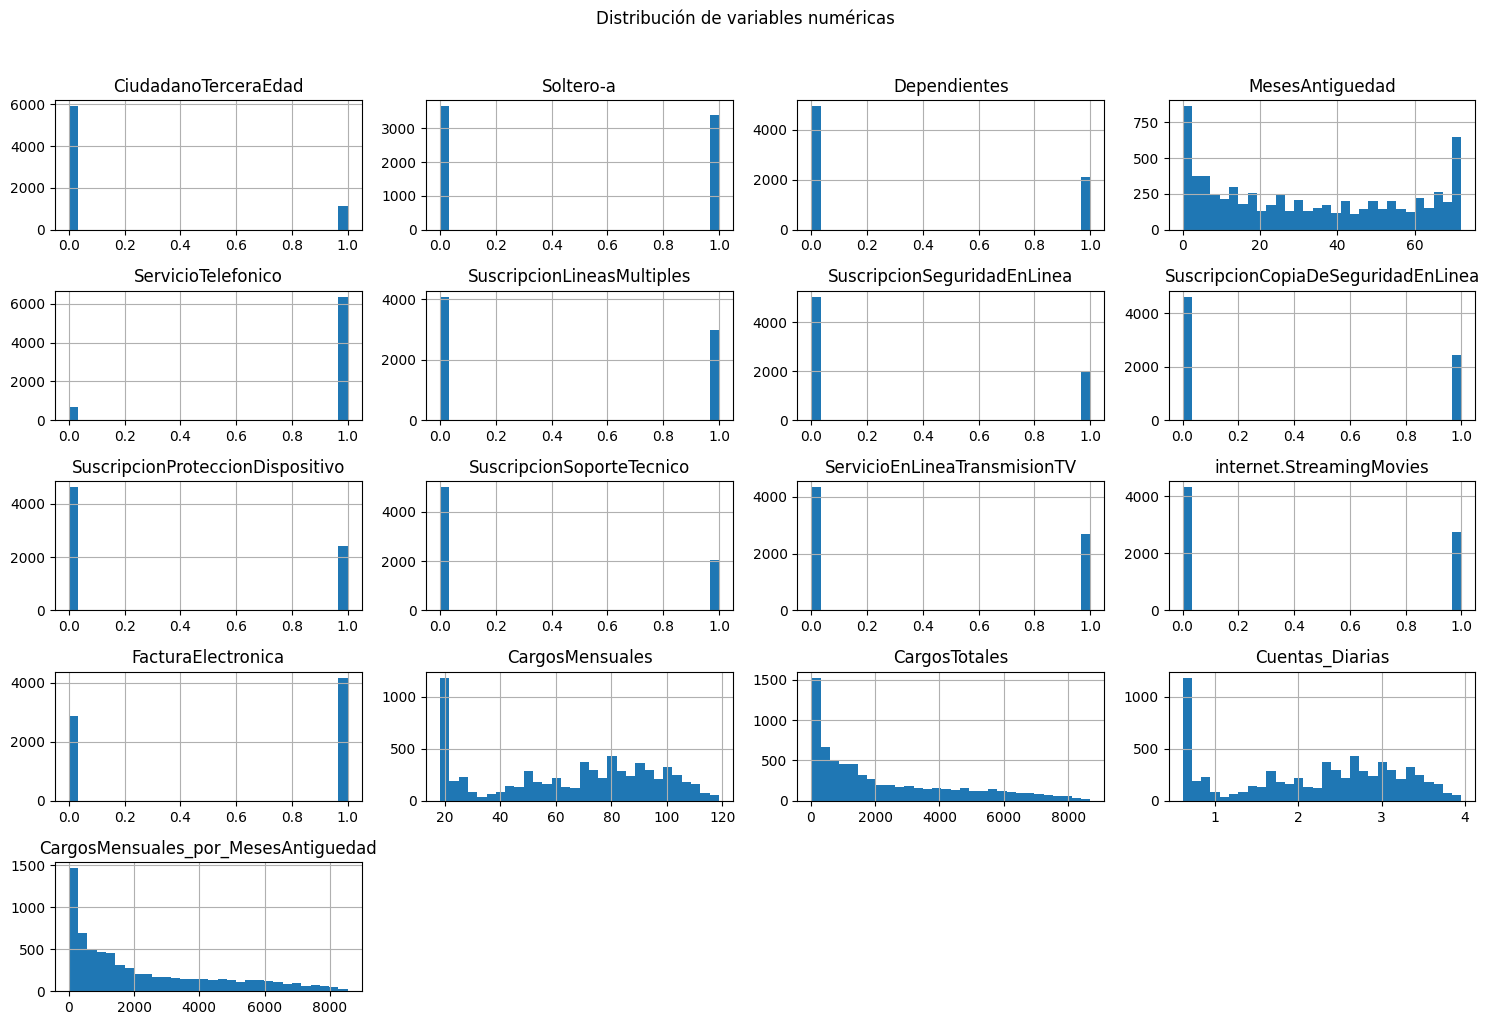

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Seleccionamos solo las columnas numéricas para visualizar
#Excluimos 'AbandonoEmpresa' por ahora ya que es la variable objetivo
columnas_numericas = df_telcom.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_numericas.remove('AbandonoEmpresa')

#Creamos histogramas para las variables numéricas
df_telcom[columnas_numericas].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas', y=1.02, ha='center')
plt.tight_layout()
plt.show()

### Proporción de categorías en variables categóricas

Ahora, visualizaremos la distribución de las categorías en las variables categóricas utilizando gráficos de barras para ver el balance de cada categoría.

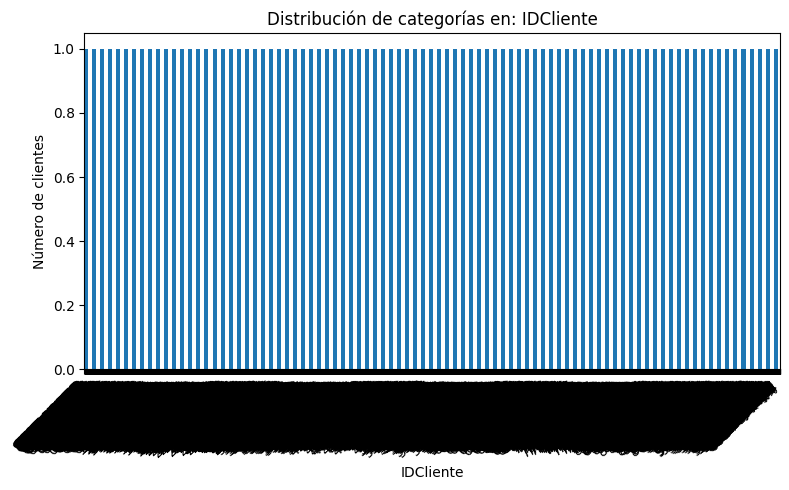

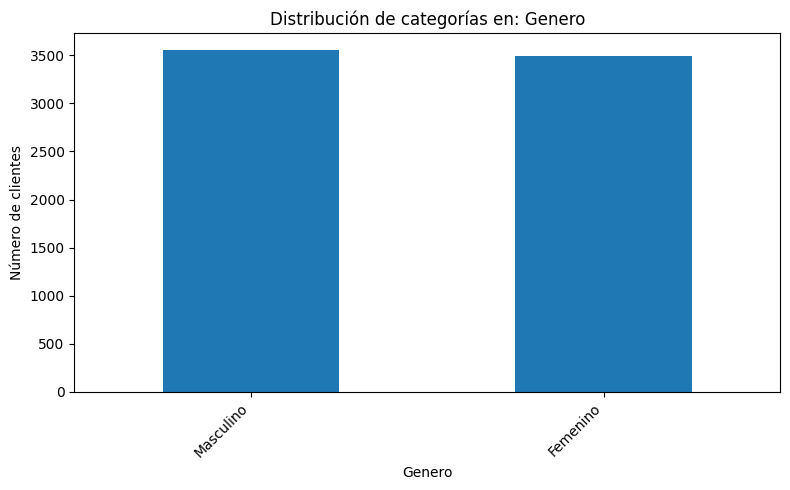

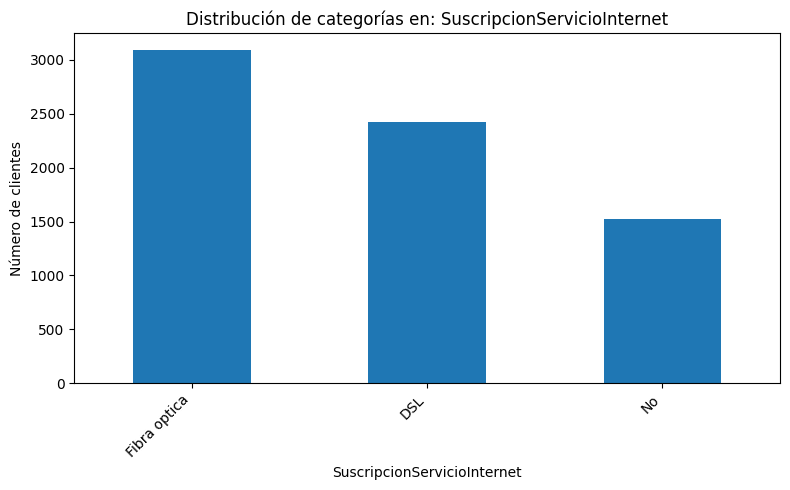

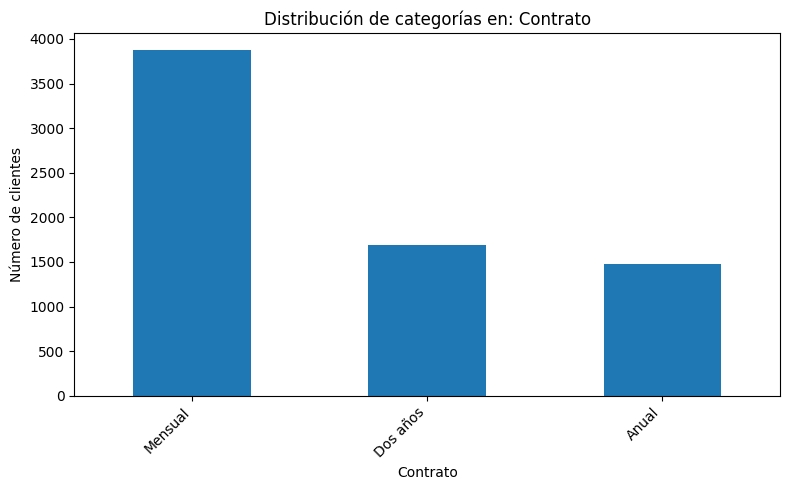

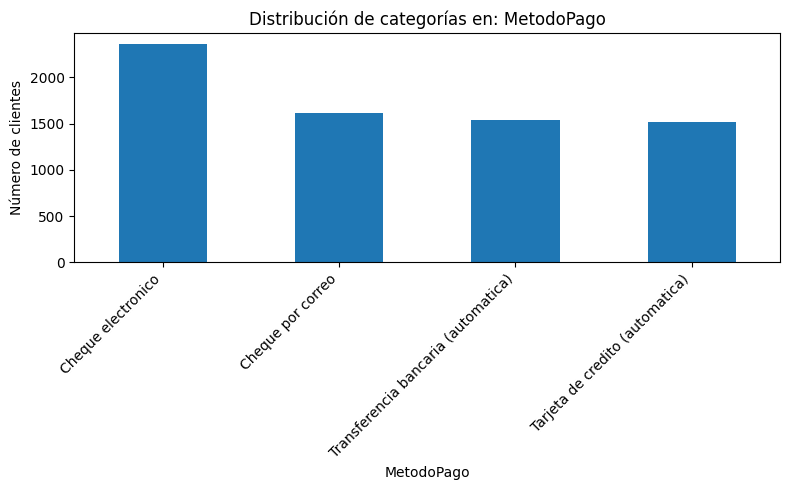

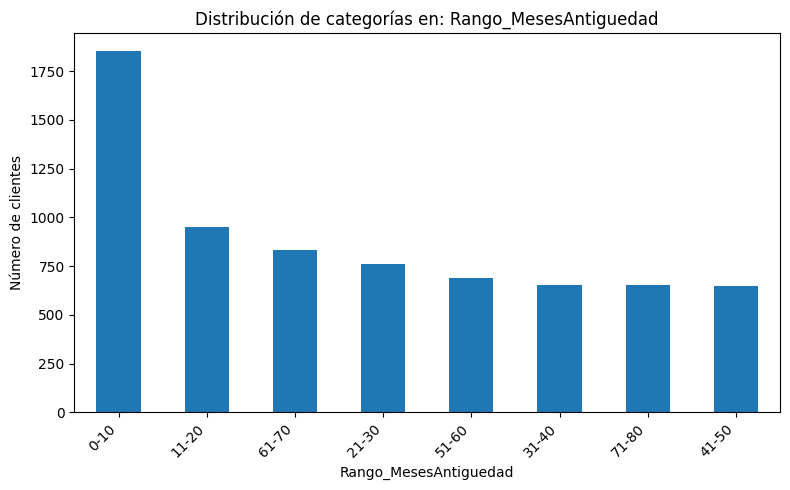

In [7]:
#Seleccionamos solo las columnas categóricas
#Excluimos 'IDCliente' ya que lo eliminaremos después y no es relevante para la distribución de categorías
columnas_categoricas = df_telcom.select_dtypes(include='object').columns.tolist()

#Crear gráficos de barras para las variables categóricas
for col in columnas_categoricas:
    plt.figure(figsize=(8, 5))
    df_telcom[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de categorías en: {col}')
    plt.xlabel(col)
    plt.ylabel('Número de clientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Eliminación de columnas irrelevantes

In [8]:
#Eliminamos las columnas "IDCliente, Rango_MesesAntiguedad, Cuentas_Diarias y CargosMensuales_por_MesesAntiguedad"
df_telcom.drop('IDCliente', axis=1, inplace=True)
df_telcom.drop('Rango_MesesAntiguedad', axis=1, inplace=True)
df_telcom.drop('Cuentas_Diarias', axis=1, inplace=True)
df_telcom.drop('CargosMensuales_por_MesesAntiguedad', axis=1, inplace=True)

In [9]:
df_telcom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   AbandonoEmpresa                     7043 non-null   int64  
 1   Genero                              7043 non-null   object 
 2   CiudadanoTerceraEdad                7043 non-null   int64  
 3   Soltero-a                           7043 non-null   int64  
 4   Dependientes                        7043 non-null   int64  
 5   MesesAntiguedad                     7043 non-null   int64  
 6   ServicioTelefonico                  7043 non-null   int64  
 7   SuscripcionLineasMultiples          7043 non-null   int64  
 8   SuscripcionServicioInternet         7043 non-null   object 
 9   SuscripcionSeguridadEnLinea         7043 non-null   int64  
 10  SuscripcionCopiaDeSeguridadEnLinea  7043 non-null   int64  
 11  SuscripcionProteccionDispositivo    7043 no

##Encoding

### Determinando variables respuesta y explicativas

In [10]:
X = df_telcom.drop('AbandonoEmpresa', axis=1) #Variable explicativa
y = df_telcom['AbandonoEmpresa'] #Variable respuesta

### Transformando las variables explicativas

In [11]:
columnas = X.columns

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

#Definimos el imputer para las columnas numéricas, evitando así posibles fugas de datos (data leakage)
#Vamos a imputar con la estrategia media
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#Definimos la columna transformer
#Que aplica el OneHotEncoder a las otras columnas categóricas y el SimpleImputer al resto de las columnas
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'),['Genero', 'SuscripcionServicioInternet', 'Contrato', 'MetodoPago']),
    (imputer, ['CiudadanoTerceraEdad', 'Soltero-a', 'Dependientes', 'MesesAntiguedad', 'ServicioTelefonico', 'SuscripcionLineasMultiples', 'SuscripcionSeguridadEnLinea', 'SuscripcionCopiaDeSeguridadEnLinea', 'SuscripcionProteccionDispositivo', 'SuscripcionSoporteTecnico', 'ServicioEnLineaTransmisionTV', 'internet.StreamingMovies', 'FacturaElectronica', 'CargosMensuales', 'CargosTotales']),
    remainder='passthrough', sparse_threshold=0, force_int_remainder_cols=False)

In [13]:
X = one_hot.fit_transform(X)

In [14]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__Genero_Masculino',
       'onehotencoder__SuscripcionServicioInternet_DSL',
       'onehotencoder__SuscripcionServicioInternet_Fibra optica',
       'onehotencoder__SuscripcionServicioInternet_No',
       'onehotencoder__Contrato_Anual',
       'onehotencoder__Contrato_Dos años',
       'onehotencoder__Contrato_Mensual',
       'onehotencoder__MetodoPago_Cheque electronico',
       'onehotencoder__MetodoPago_Cheque por correo',
       'onehotencoder__MetodoPago_Tarjeta de credito (automatica)',
       'onehotencoder__MetodoPago_Transferencia bancaria (automatica)',
       'simpleimputer__CiudadanoTerceraEdad', 'simpleimputer__Soltero-a',
       'simpleimputer__Dependientes', 'simpleimputer__MesesAntiguedad',
       'simpleimputer__ServicioTelefonico',
       'simpleimputer__SuscripcionLineasMultiples',
       'simpleimputer__SuscripcionSeguridadEnLinea',
       'simpleimputer__SuscripcionCopiaDeSeguridadEnLinea',
       'simpleimputer__SuscripcionProteccionDispos

In [15]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__Genero_Masculino,onehotencoder__SuscripcionServicioInternet_DSL,onehotencoder__SuscripcionServicioInternet_Fibra optica,onehotencoder__SuscripcionServicioInternet_No,onehotencoder__Contrato_Anual,onehotencoder__Contrato_Dos años,onehotencoder__Contrato_Mensual,onehotencoder__MetodoPago_Cheque electronico,onehotencoder__MetodoPago_Cheque por correo,onehotencoder__MetodoPago_Tarjeta de credito (automatica),...,simpleimputer__SuscripcionLineasMultiples,simpleimputer__SuscripcionSeguridadEnLinea,simpleimputer__SuscripcionCopiaDeSeguridadEnLinea,simpleimputer__SuscripcionProteccionDispositivo,simpleimputer__SuscripcionSoporteTecnico,simpleimputer__ServicioEnLineaTransmisionTV,simpleimputer__internet.StreamingMovies,simpleimputer__FacturaElectronica,simpleimputer__CargosMensuales,simpleimputer__CargosTotales
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90
7039,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70
7040,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75
7041,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65


## Verificación de la proporción de cancelación (churn)

In [16]:
df_telcom['AbandonoEmpresa'].value_counts()

,count
AbandonoEmpresa,
0,5174
1,1869


In [17]:
df_telcom['AbandonoEmpresa'].value_counts(normalize=True)

,proportion
AbandonoEmpresa,
0,0.73463
1,0.26537


## Visualización de la matriz de correlación

Generamos una matriz de correlación para explorar las relaciones entre las variables numéricas y la variable objetivo ('AbandonoEmpresa') después del encoding y la imputación.

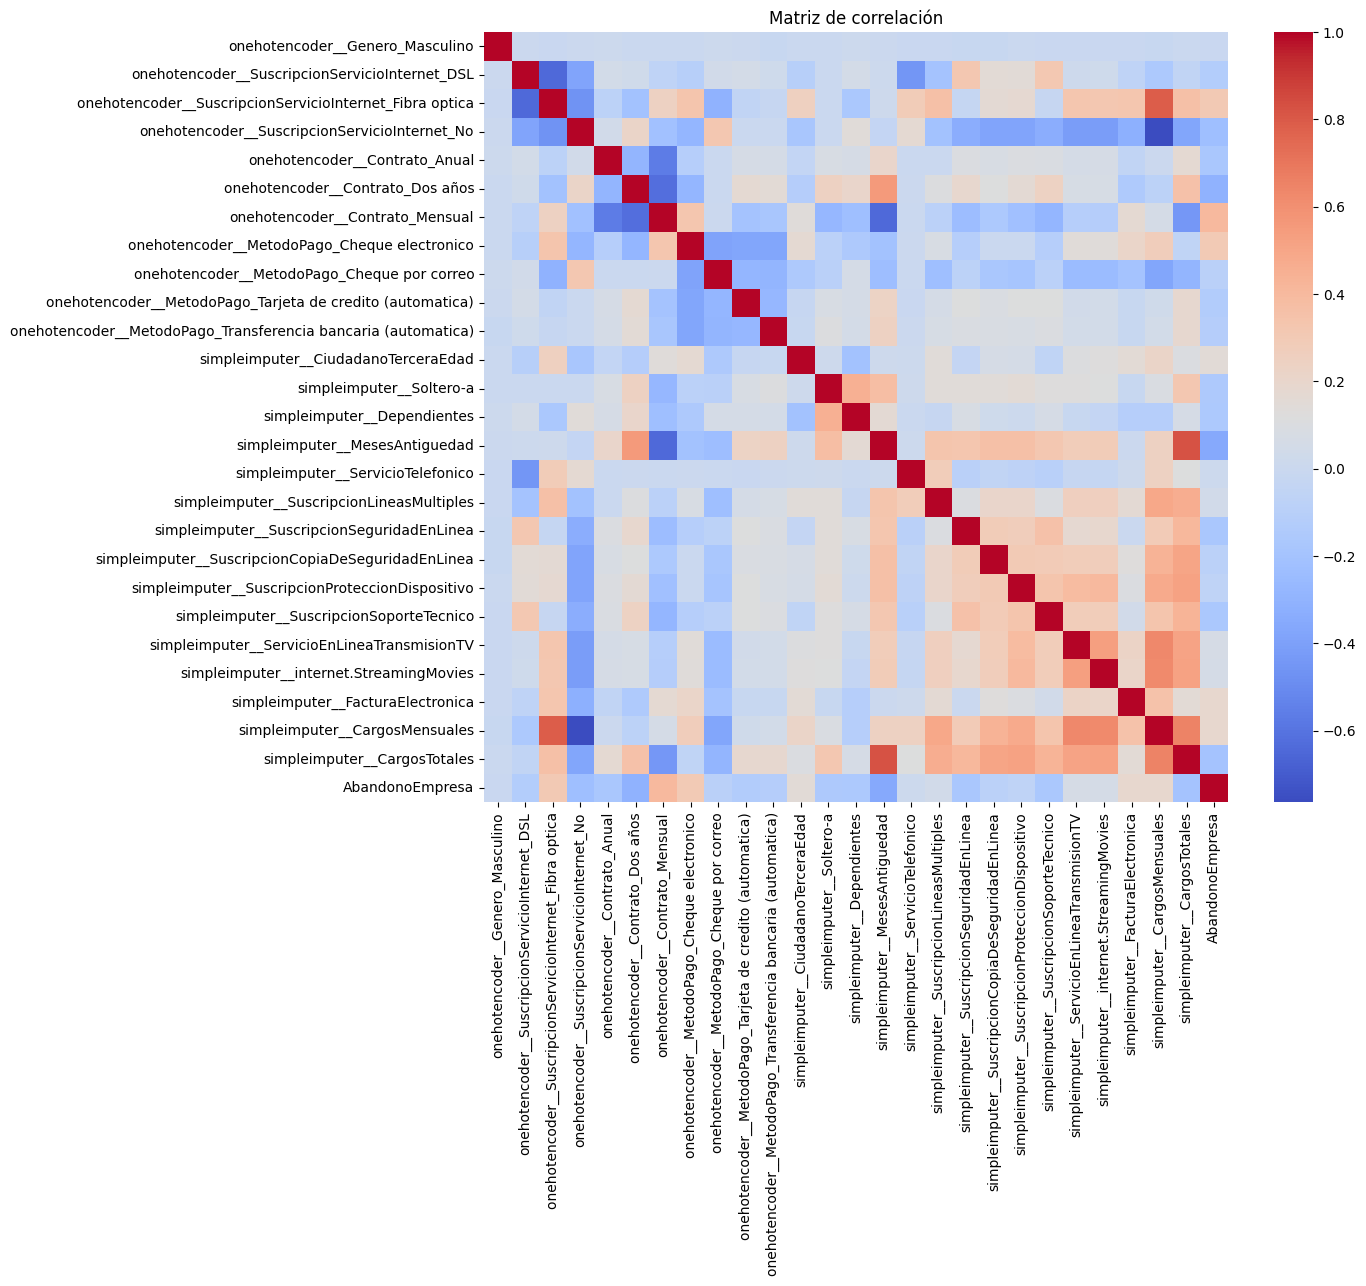

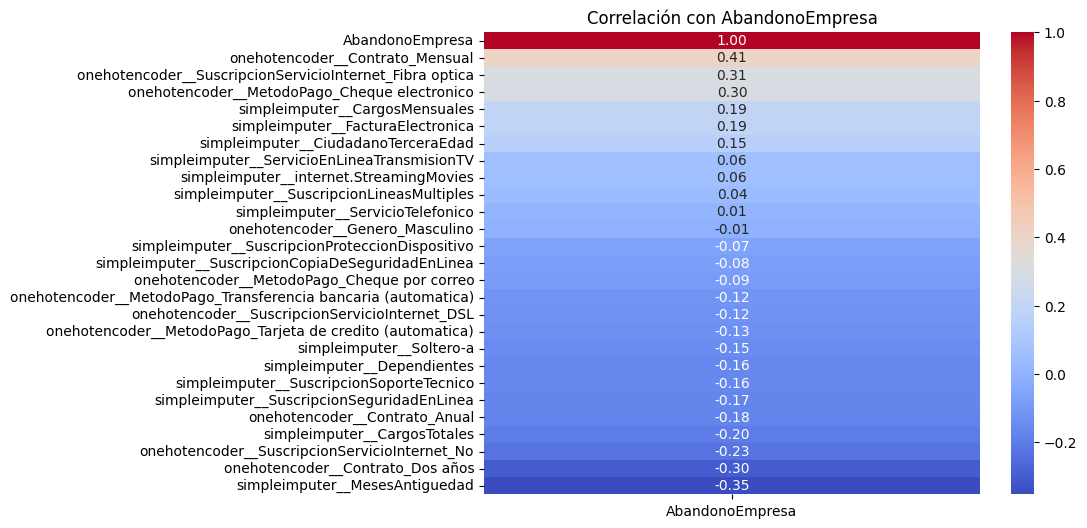

,AbandonoEmpresa
AbandonoEmpresa,1.000000
onehotencoder__Contrato_Mensual,0.405103
onehotencoder__SuscripcionServicioInternet_Fibra optica,0.308020
onehotencoder__MetodoPago_Cheque electronico,0.301919
simpleimputer__CargosMensuales,0.193356
simpleimputer__FacturaElectronica,0.191825
simpleimputer__CiudadanoTerceraEdad,0.150889
simpleimputer__ServicioEnLineaTransmisionTV,0.063228
simpleimputer__internet.StreamingMovies,0.061382
simpleimputer__SuscripcionLineasMultiples,0.040102


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#Convertimos a X de vuelta a un DataFrame para poder incluir la variable objetivo 'y' y tener nombres de columnas comprensibles
X_df = pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

#Añadimos la variable objetivo 'y' al DataFrame para calcular su correlación con las características
df_encoded = X_df.copy()
df_encoded['AbandonoEmpresa'] = y.values

#Calcular la matriz de correlación
matriz_correlacion = df_encoded.corr()

#Visualizar la matriz de correlación (opcionalmente, solo la correlación con 'AbandonoEmpresa')
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=False, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Mostrar solo la correlación con la variable objetivo 'AbandonoEmpresa'
plt.figure(figsize=(8, 6))
correlacion_con_churn = matriz_correlacion[['AbandonoEmpresa']].sort_values(by='AbandonoEmpresa', ascending=False)
sns.heatmap(correlacion_con_churn, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación con AbandonoEmpresa')
plt.show()

display(correlacion_con_churn)

## Análisis Dirigido

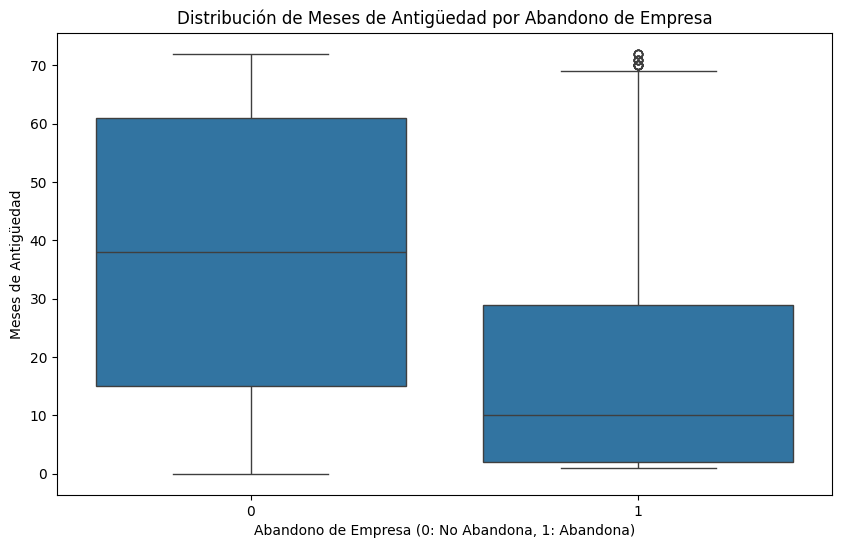

In [19]:
#Realizamos un boxplot para analizar la relación entre MesesAntiguedad y el AbandonoEmpresa
plt.figure(figsize=(10, 6))
sns.boxplot(x='AbandonoEmpresa', y='simpleimputer__MesesAntiguedad', data=df_encoded)
plt.title('Distribución de Meses de Antigüedad por Abandono de Empresa')
plt.xlabel('Abandono de Empresa (0: No Abandona, 1: Abandona)')
plt.ylabel('Meses de Antigüedad')
plt.show()

El boxplot de "Meses de Antigüedad por Abandono de Empresa" muestra que los clientes que abandonan la empresa tienden a tener una antigüedad significativamente menor que aquellos que no abandonan. La mediana de meses de antigüedad es mucho más baja para el grupo que abandona. Esto sugiere que los clientes con menos tiempo en la empresa son más propensos a irse.

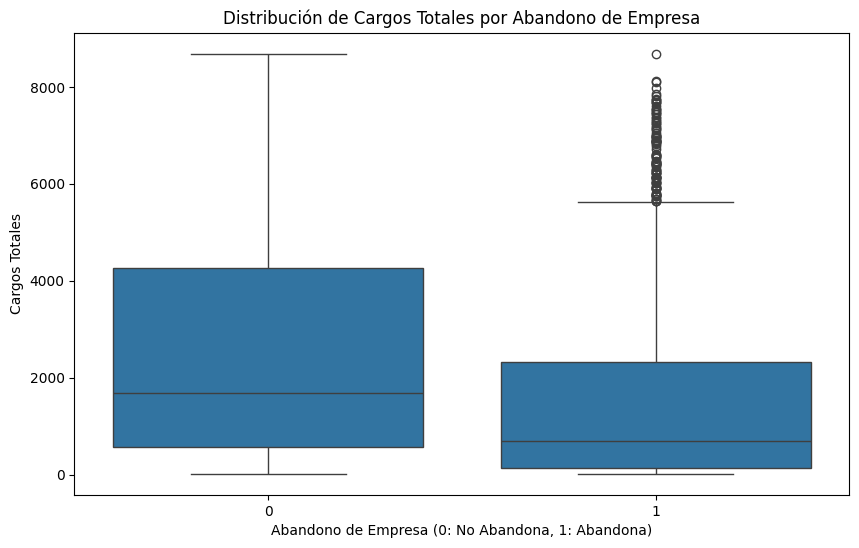

In [20]:
#Realizamos un boxplot para analizar la relación entre CargosTotales y el AbandonoEmpresa
plt.figure(figsize=(10, 6))
sns.boxplot(x='AbandonoEmpresa', y='simpleimputer__CargosTotales', data=df_encoded)
plt.title('Distribución de Cargos Totales por Abandono de Empresa')
plt.xlabel('Abandono de Empresa (0: No Abandona, 1: Abandona)')
plt.ylabel('Cargos Totales')
plt.show()

Esto nos indica que los clientes que abandonan tienen, en general, cargos totales más bajos en comparación con los clientes que no abandonan. Esto podría estar relacionado con la menor antigüedad de los clientes que se van.

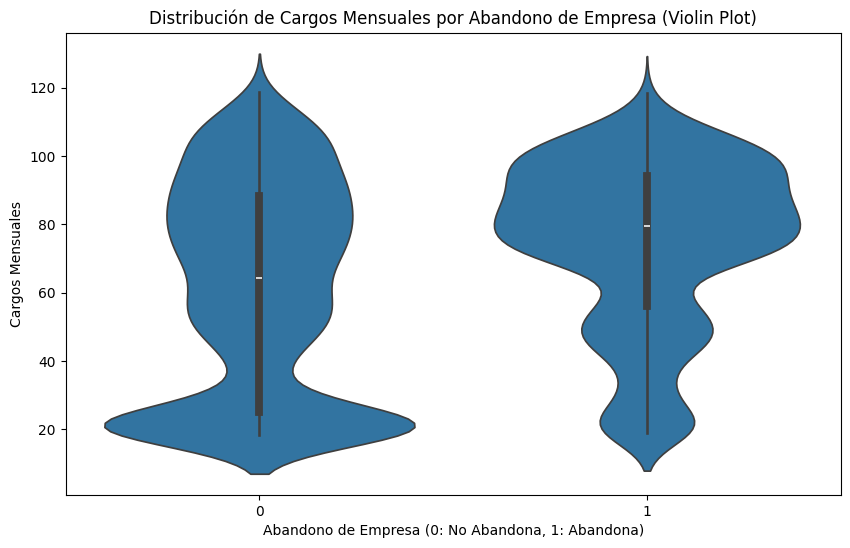

In [21]:
#Hacemos un gráfico de violin para ver la relación de CargosMensuales vs AbandonoEmpresa
plt.figure(figsize=(10, 6))
sns.violinplot(x='AbandonoEmpresa', y='simpleimputer__CargosMensuales', data=df_encoded)
plt.title('Distribución de Cargos Mensuales por Abandono de Empresa (Violin Plot)')
plt.xlabel('Abandono de Empresa (0: No Abandona, 1: Abandona)')
plt.ylabel('Cargos Mensuales')
plt.show()

El violin plot de "Distribución de Cargos Mensuales por Abandono de Empresa" complementa el análisis de cargos. Muestra que la distribución de cargos mensuales para los clientes que abandonan está más concentrada en valores más altos en comparación con los clientes que no abandonan, cuya distribución es más amplia y se extiende a valores más bajos. Esto podría sugerir que los clientes con cargos mensuales más elevados, especialmente en los primeros meses, son más propensos al abandono.

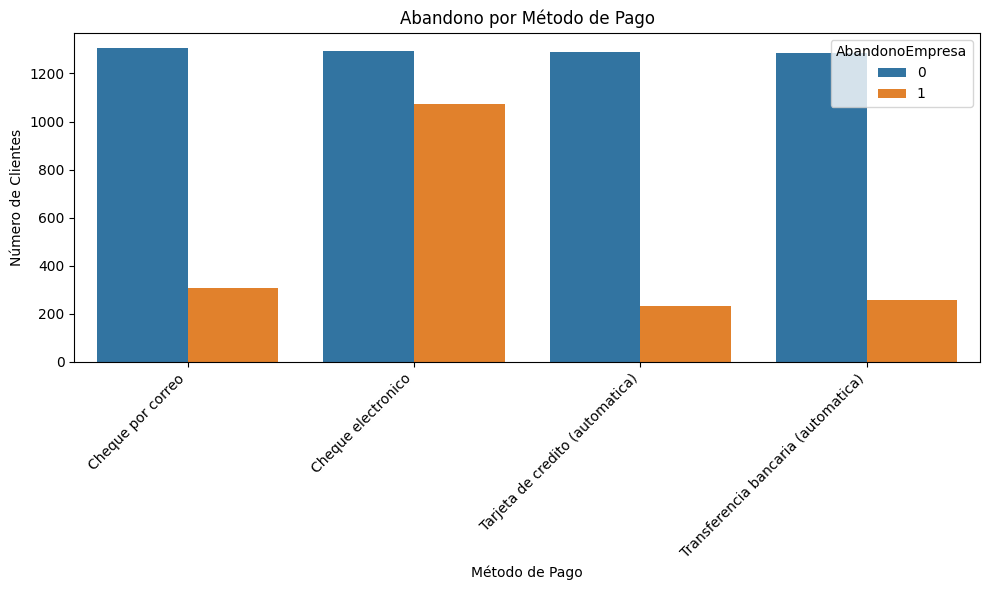

In [22]:
#Hacemos un gráfico de barras para observar la relación de MetodoPago vs AbandonoEmpresa (usando el DataFrame original)
plt.figure(figsize=(10, 6))
sns.countplot(x='MetodoPago', hue='AbandonoEmpresa', data=df_telcom)
plt.title('Abandono por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observa que los clientes que mas frecuentremente pagan con cheque electronico terminan abandonando. Esto tambien se condice con la correlacion positiva de 0.3 de la variable Cheque_Electronico con la de Abandono.

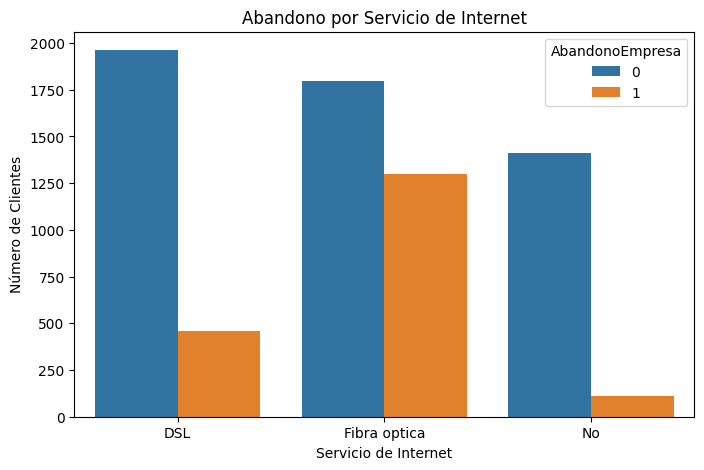

In [23]:
#Hacemos un gráfico de barras para ver la relación entre SuscripcionServicioInternet vs AbandonoEmpresa (usando el DataFrame original)
plt.figure(figsize=(8, 5))
sns.countplot(x='SuscripcionServicioInternet', hue='AbandonoEmpresa', data=df_telcom)
plt.title('Abandono por Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Número de Clientes')
plt.show()

Se observa que los clientes que mas frecuentremente contratan servicio de Fibra Optica de Internet terminan abandonando. Esto tambien se condice con la correlacion positiva de 0.3 de la variable SuscripcionServicioInternet_Fibra optica con la de Abandono.

## División de los datos en conjuntos de entrenamiento y prueba

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Hemos dividido los datos en un 80% para entrenamiento y un 20% para prueba, manteniendo la proporción de la variable respuesta ('stratify=y') en ambos conjuntos.

### Implementando smote


Aplicamos la técnica SMOTE al conjunto de entrenamiento ('X_train', 'y_train') para generar muestras sintéticas de la clase minoritaria.


In [25]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE()
X_train_resampled, y_train_resampled = oversampling.fit_resample(X_train, y_train)

En consecuencia con SMOTE hacemos un balanceo de clases al conjunto de entrenamiento.

In [26]:
y_train_resampled.value_counts(normalize=True)

,proportion
AbandonoEmpresa,
0,0.5
1,0.5


## Primer modelo "Regresión Logistica"

Construimos un pipeline que combine los pasos de preprocesamiento con el modelo de clasificación y una normalización


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

In [28]:
#Entrenando el modelo con el pipeline y scaler
pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

### Evaluando el modelo (Regresión Logistica)


Evaluamos el rendimiento del modelo en el conjunto de prueba utilizando métricas apropiadas para problemas de clasificación con desbalance de clases


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisión: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

Accuracy: 0.7473
Precisión: 0.5155
Recall: 0.7995
F1-score: 0.6268
ROC AUC Score: 0.8427


### Matriz de confusión (Regresión Logistica)

--- Matriz de Confusión para Regresión Logistica ---


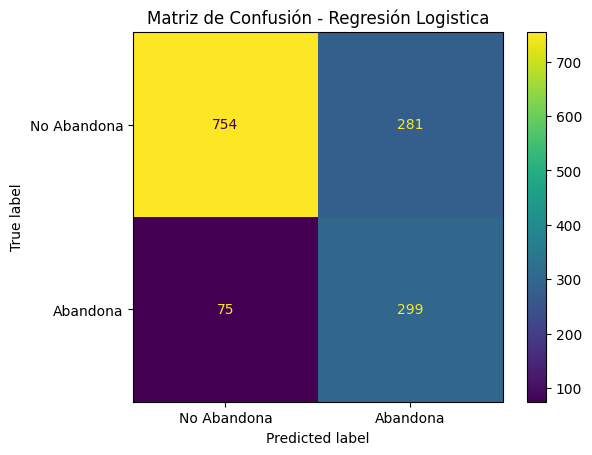

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Matriz de confusión para Regresión Logistica
cm_lr = confusion_matrix(y_test, y_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['No Abandona', 'Abandona'])

print("--- Matriz de Confusión para Regresión Logistica ---")
disp_lr.plot()
plt.title('Matriz de Confusión - Regresión Logistica')
plt.show()

### Validación cruzada (Regresión Logistica)

Realizamos validación cruzada con el pipeline para obtener una estimación más robusta del rendimiento del modelo.


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

scoring = ['recall', 'f1', 'roc_auc']
cv_scores = {}

for metrica in scoring:
    scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=5, scoring=metrica)
    cv_scores[metrica] = scores
    print(f"Valores de validación cruzada en{metrica.capitalize()}: {scores}")
    print(f"Valor promedio de {metrica.capitalize()}: {scores.mean():.4f}")

Valores de validación cruzada enRecall: [0.82004831 0.78743961 0.83816425 0.81741233 0.81521739]
Valor promedio de Recall: 0.8157
Valores de validación cruzada enF1: [0.79045402 0.77114134 0.7877412  0.78787879 0.7749713 ]
Valor promedio de F1: 0.7824
Valores de validación cruzada enRoc_auc: [0.85795687 0.84807989 0.85570696 0.85241458 0.84772386]
Valor promedio de Roc_auc: 0.8524


## Segundo modelo "KNeighbors Classifier"
Creamos una nuevo pipeline usando 'MinMaxScaler' y 'KNeighborsClassifier', lo entrenamos en los datos balanceados ('X_train_resampled', 'y_train_resampled'), evaluamos su performance en el test set ('X_test', 'y_test'), validación cruzada, comprar su rendimiento con el modelo 'LogisticRegression', y resumir los hallazgos.

In [32]:
#Creando el nuevo pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

In [33]:
#Entrenando el nuevo pipeline
knn_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier())])

### Evaluando el modelo (KNN)




In [34]:
#Evaluando el nuevo modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_knn = knn_pipeline.predict(X_test)
y_pred_proba_knn = knn_pipeline.predict_proba(X_test)[:, 1]

print(f"Accuracy (KNN): {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision (KNN): {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall (KNN): {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-score (KNN): {f1_score(y_test, y_pred_knn):.4f}")
print(f"ROC AUC Score (KNN): {roc_auc_score(y_test, y_pred_proba_knn):.4f}")

Accuracy (KNN): 0.7040
Precision (KNN): 0.4648
Recall (KNN): 0.7594
F1-score (KNN): 0.5766
ROC AUC Score (KNN): 0.7722


### Matriz de confusión (KNN)


--- Matriz de Confusión para KNN ---


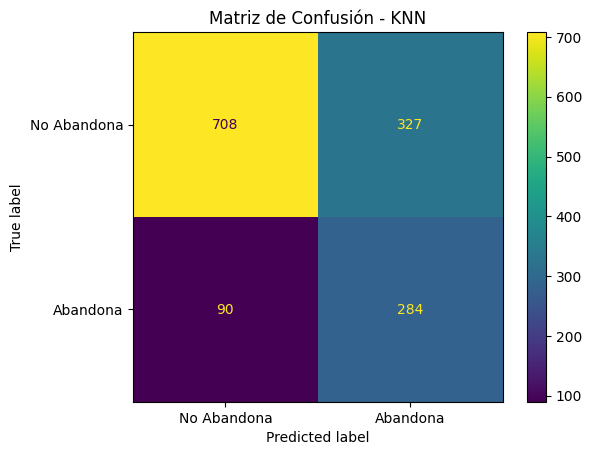

In [35]:
#Matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['No Abandona', 'Abandona'])

print("\n--- Matriz de Confusión para KNN ---")
disp_knn.plot()
plt.title('Matriz de Confusión - KNN')
plt.show()

### Validación cruzada (KNN)



In [36]:
#Rendimiento en validación cruzada
from sklearn.model_selection import cross_val_score

scoring = ['recall', 'f1', 'roc_auc']
knn_cv_scores = {}

for metrica in scoring:
    scores = cross_val_score(knn_pipeline, X_train_resampled, y_train_resampled, cv=5, scoring=metrica)
    knn_cv_scores[metrica] = scores
    print(f"Valores de validación cruzada en (KNN){metrica.capitalize()}: {scores}")
    print(f"Valor promedio de (KNN) {metrica.capitalize()}: {scores.mean():.4f}")

Valores de validación cruzada en (KNN)Recall: [0.85386473 0.84057971 0.94323671 0.94437727 0.93236715]
Valor promedio de (KNN) Recall: 0.9029
Valores de validación cruzada en (KNN)F1: [0.7807841  0.77290394 0.81822944 0.83306667 0.82788204]
Valor promedio de (KNN) F1: 0.8066
Valores de validación cruzada en (KNN)Roc_auc: [0.82149015 0.82216184 0.87598894 0.89045003 0.88297145]
Valor promedio de (KNN) Roc_auc: 0.8586


## Tercer modelo "Decision Tree Classifier"
Creamos un pipeline usando 'DecisionTreeClassifier', lo entrenamos en los datos balanceados ('X_train_resampled', 'y_train_resampled'), evaluamos su performance en el test set ('X_test', 'y_test'), validación cruzada, y mostraremos los resultados.

In [37]:
#Creando el nuevo pipeline para Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [38]:
#Entrenando el nuevo pipeline
dt_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('classifier', DecisionTreeClassifier(random_state=42))])

### Evaluando el modelo (Decision Tree Classifier)

In [39]:
#Evaluando el nuevo modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_dt = dt_pipeline.predict(X_test)
y_pred_proba_dt = dt_pipeline.predict_proba(X_test)[:, 1]

print(f"Accuracy (Decision Tree): {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision (Decision Tree): {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall (Decision Tree): {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score (Decision Tree): {f1_score(y_test, y_pred_dt):.4f}")
print(f"ROC AUC Score (Decision Tree): {roc_auc_score(y_test, y_pred_proba_dt):.4f}")

Accuracy (Decision Tree): 0.7282
Precision (Decision Tree): 0.4884
Recall (Decision Tree): 0.5080
F1-score (Decision Tree): 0.4980
ROC AUC Score (Decision Tree): 0.6572


### Matriz de confusión (Decision Tree Classifier)


--- Matriz de Confusión para Decision Tree Classifier ---


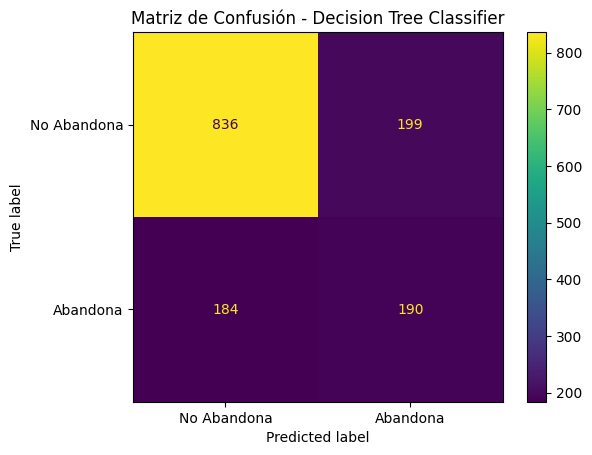

In [40]:
#Creando Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No Abandona', 'Abandona'])

print("\n--- Matriz de Confusión para Decision Tree Classifier ---")
disp_dt.plot()
plt.title('Matriz de Confusión - Decision Tree Classifier')
plt.show()

### Validación cruzada (Decision Tree Classifier)

In [41]:
#Rendimiento en validación cruzada
from sklearn.model_selection import cross_val_score

scoring = ['recall', 'f1', 'roc_auc']
dt_cv_scores = {}

for metrica in scoring:
    scores = cross_val_score(dt_pipeline, X_train_resampled, y_train_resampled, cv=5, scoring=metrica)
    dt_cv_scores[metrica] = scores
    print(f"Valores de validación cruzada en (Decision Tree){metrica.capitalize()}: {scores}")
    print(f"Valor promedio de (Decision Tree) {metrica.capitalize()}: {scores.mean():.4f}")

Valores de validación cruzada en (Decision Tree)Recall: [0.4673913  0.58333333 0.9673913  0.96977025 0.96980676]
Valor promedio de (Decision Tree) Recall: 0.7915
Valores de validación cruzada en (Decision Tree)F1: [0.58327054 0.66300618 0.87540984 0.89111111 0.88729282]
Valor promedio de (Decision Tree) F1: 0.7800
Valores de validación cruzada en (Decision Tree)Roc_auc: [0.66594174 0.70399397 0.8630868  0.8832555  0.87760823]
Valor promedio de (Decision Tree) Roc_auc: 0.7988


## Comparando el rendimiento de los tres modelos

In [42]:
print("--- Performance de Logistic Regression en el Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\n--- Performance de KNN en el Test Set ---")
print(f"Accuracy (KNN): {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision (KNN): {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall (KNN): {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-score (KNN): {f1_score(y_test, y_pred_knn):.4f}")
print(f"ROC AUC Score (KNN): {roc_auc_score(y_test, y_pred_proba_knn):.4f}")
print("\n--- Performance de Decision Tree Classifier en el Test Set ---")
print(f"Accuracy (Decision Tree): {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision (Decision Tree): {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall (Decision Tree): {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score (Decision Tree): {f1_score(y_test, y_pred_dt):.4f}")
print(f"ROC AUC Score (Decision Tree): {roc_auc_score(y_test, y_pred_proba_dt):.4f}")

print("\n--- Valores de validación cruzada en Logistic Regression (Promedio) ---")
for metrica, scores in cv_scores.items():
    print(f"Valor promedio de {metrica.capitalize()}: {scores.mean():.4f}")

print("\n--- Valores de validación cruzada en KNN (Promedio) ---")
for metrica, scores in knn_cv_scores.items():
    print(f"Valor promedio de (KNN) {metrica.capitalize()}: {scores.mean():.4f}")

print("\n--- Valores de validación cruzada en Decision Tree Classifier (Promedio) ---")
for metrica, scores in dt_cv_scores.items():
    print(f"Valor promedio de (Decision Tree) {metrica.capitalize()}: {scores.mean():.4f}")

--- Performance de Logistic Regression en el Test Set ---
Accuracy: 0.7473
Precision: 0.5155
Recall: 0.7995
F1-score: 0.6268
ROC AUC Score: 0.8427

--- Performance de KNN en el Test Set ---
Accuracy (KNN): 0.7040
Precision (KNN): 0.4648
Recall (KNN): 0.7594
F1-score (KNN): 0.5766
ROC AUC Score (KNN): 0.7722

--- Performance de Decision Tree Classifier en el Test Set ---
Accuracy (Decision Tree): 0.7282
Precision (Decision Tree): 0.4884
Recall (Decision Tree): 0.5080
F1-score (Decision Tree): 0.4980
ROC AUC Score (Decision Tree): 0.6572

--- Valores de validación cruzada en Logistic Regression (Promedio) ---
Valor promedio de Recall: 0.8157
Valor promedio de F1: 0.7824
Valor promedio de Roc_auc: 0.8524

--- Valores de validación cruzada en KNN (Promedio) ---
Valor promedio de (KNN) Recall: 0.9029
Valor promedio de (KNN) F1: 0.8066
Valor promedio de (KNN) Roc_auc: 0.8586

--- Valores de validación cruzada en Decision Tree Classifier (Promedio) ---
Valor promedio de (Decision Tree) Recall

In [43]:
#Resumiendo la comparación de ambos basandose en las metricas impresas
print("--- Resumen de comparación de modelos ---")
print("Basado en la evaluación de metricas en los Test Set y los valores promedio de las validaciones cruzadas:")
print("\nLogistic Regression (con StandardScaler):")
print(f"- Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"- Test Set Precision: {precision_score(y_test, y_pred):.4f}")
print(f"- Test Set Recall: {recall_score(y_test, y_pred):.4f}")
print(f"- Test Set F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"- Test Set ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"- Promedio CV Recall: {cv_scores['recall'].mean():.4f}")
print(f"- Promedio CV F1-score: {cv_scores['f1'].mean():.4f}")
print(f"- Promedio CV ROC AUC Score: {cv_scores['roc_auc'].mean():.4f}")

print("\nKNeighbors Classifier (con MinMaxScaler):")
print(f"- Test Set Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"- Test Set Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"- Test Set Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"- Test Set F1-score: {f1_score(y_test, y_pred_knn):.4f}")
print(f"- Test Set ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_knn):.4f}")
print(f"- Promedio CV Recall: {knn_cv_scores['recall'].mean():.4f}")
print(f"- Promedio CV F1-score: {knn_cv_scores['f1'].mean():.4f}")
print(f"- Promedio CV ROC AUC Score: {knn_cv_scores['roc_auc'].mean():.4f}")

print("\nDecision Tree Classifier:")
print(f"- Test Set Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"- Test Set Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"- Test Set Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"- Test Set F1-score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"- Test Set ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_dt):.4f}")
print(f"- Promedio CV Recall: {dt_cv_scores['recall'].mean():.4f}")
print(f"- Promedio CV F1-score: {dt_cv_scores['f1'].mean():.4f}")
print(f"- Promedio CV ROC AUC Score: {dt_cv_scores['roc_auc'].mean():.4f}")

print("\nComparación general:")
print() #
print("-Generalmente el modelo de regresión logística tiene un mejor rendimiento en todas sus metricas del \nTest Set (Accuracy, Precision, F1-score, and ROC AUC).")
print() #
print("-KNN muestra un promedio superior en el valor Recall de validación cruzada, sugiriendo que podría ser el \nmejor modelo al identificar la clase minoritaria durante el entramiento.")
print() #
print("-Por otro lado, el tercer modelo de arbol presenta los valores cruzados más equilibrados de los tres modelos. \nSin embargo la gran diferencia con sus valores anteriores en el test set pueden indicar un fuerte overfitting.")

print("\n¿Algún modelo presentó overfitting o underfitting?")
print() #
print("-Regresión logística: Es el modelo más estable en términos de overfitting/underfitting entre los tres. Su performace \nen el test set es consistente con el rendimiento de validación cruzada.")
print() #
print("-KNN: Muestra algunos signos de overfitting, con métricas de validación cruzada notablemente mejores que las del test set. \nEl uso de hiperparámetros y el ajuste de umbral de n_neighbors es crucial para mejorar su generalización.")
print() #
print("-Decision Tree Classifier: Presenta el overfitting más evidente, con una gran brecha entre el rendimiento de entrenamiento \ny prueba. La sintonización de hiperparámetros como max_depth, min_samples_split, y min_samples_leaf será esencial para controlarlo. ")

--- Resumen de comparación de modelos ---
Basado en la evaluación de metricas en los Test Set y los valores promedio de las validaciones cruzadas:

Logistic Regression (con StandardScaler):
- Test Set Accuracy: 0.7473
- Test Set Precision: 0.5155
- Test Set Recall: 0.7995
- Test Set F1-score: 0.6268
- Test Set ROC AUC Score: 0.8427
- Promedio CV Recall: 0.8157
- Promedio CV F1-score: 0.7824
- Promedio CV ROC AUC Score: 0.8524

KNeighbors Classifier (con MinMaxScaler):
- Test Set Accuracy: 0.7040
- Test Set Precision: 0.4648
- Test Set Recall: 0.7594
- Test Set F1-score: 0.5766
- Test Set ROC AUC Score: 0.7722
- Promedio CV Recall: 0.9029
- Promedio CV F1-score: 0.8066
- Promedio CV ROC AUC Score: 0.8586

Decision Tree Classifier:
- Test Set Accuracy: 0.7282
- Test Set Precision: 0.4884
- Test Set Recall: 0.5080
- Test Set F1-score: 0.4980
- Test Set ROC AUC Score: 0.6572
- Promedio CV Recall: 0.7915
- Promedio CV F1-score: 0.7800
- Promedio CV ROC AUC Score: 0.7988

Comparación general

## Evaluación de Modelos con Umbral Ajustable

### Regresión Logistica con Umbral Ajustable

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Obtenemos las probabilidades de predicción para Logistic Regression
y_pred_proba_lr = pipeline.predict_proba(X_test)[:, 1]

#Definimos un umbral personalizado para Logistic Regression (puedes cambiar este valor)
umbral_lr = 0.3 # Umbral por defecto

#Aplicamos el umbral para obtener las predicciones finales para Logistic Regression
y_pred_lr_umbral = (y_pred_proba_lr > umbral_lr).astype(int)

#Calculamos las métricas con las nuevas predicciones para Logistic Regression
print(f"--- Evaluación de Logistic Regression (Umbral={umbral_lr}) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_umbral):.4f}")
print(f"Precisión: {precision_score(y_test, y_pred_lr_umbral):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr_umbral):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr_umbral):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

--- Evaluación de Logistic Regression (Umbral=0.3) ---
Accuracy: 0.6544
Precisión: 0.4291
Recall: 0.9144
F1-score: 0.5841
ROC AUC Score: 0.8427


### KNN con Umbral Ajustable

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Obtenemos las probabilidades de predicción para KNN
y_pred_proba_knn = knn_pipeline.predict_proba(X_test)[:, 1]

#Definimos un umbral personalizado para KNN (puedes cambiar este valor)
umbral_knn = 0.3 # Umbral por defecto

#Aplicamos el umbral para obtener las predicciones finales para KNN
y_pred_knn_umbral = (y_pred_proba_knn > umbral_knn).astype(int)

#Calculamos las métricas con las nuevas predicciones para KNN
print(f"--- Evaluación de KNN (Umbral={umbral_knn}) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_umbral):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn_umbral):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn_umbral):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn_umbral):.4f}")
print(f"ROC AUC Score (KNN): {roc_auc_score(y_test, y_pred_proba_knn):.4f}")

--- Evaluación de KNN (Umbral=0.3) ---
Accuracy: 0.6352
Precision: 0.4123
Recall: 0.8797
F1-score: 0.5614
ROC AUC Score (KNN): 0.7722


## Sintonización de Hiperparámetros para los tres modelos

### Sintonización de Hiperparámetros para Regresión Logistica

In [46]:
from sklearn.model_selection import GridSearchCV

#Re-definimos el pipeline con un nombre diferente para evitar conflictos si se ejecuta varias veces
pipeline_lr_tuned = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

#Definimos el espacio de parámetros para la búsqueda (ejemplo: parámetro C para regularización)
#'C' es el inverso de la fuerza de regularización; valores más pequeños van a implicar una regularización más fuerte
#Ampliamos el rango de C
param_grid_lr = {
    'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

#Configuramos GridSearchCV. Usaremos 'f1' como métrica de puntuación principal debido al desbalance de clases.
#cross_val_score utiliza por defecto el conjunto de entrenamiento, por lo que usamos X_train_resampled y y_train_resampled
grid_search_lr = GridSearchCV(pipeline_lr_tuned, param_grid_lr, cv=5, scoring='f1', n_jobs=-1) #Aumentamos cv a 5 para una evaluación más robusta

#Ejecutamos la búsqueda en el conjunto de entrenamiento re-balanceado
grid_search_lr.fit(X_train_resampled, y_train_resampled)

#Mostramos los mejores parámetros encontrados
print(f"Mejores parámetros para Logistic Regression: {grid_search_lr.best_params_}")
print(f"Mejor F1-score de validación cruzada: {grid_search_lr.best_score_:.4f}")

#El mejor modelo se encuentra en grid_search_lr.best_estimator_
best_lr_model = grid_search_lr.best_estimator_

#Evaluamos el mejor modelo en el conjunto de prueba original
y_pred_lr_tuned = best_lr_model.predict(X_test)
y_pred_proba_lr_tuned = best_lr_model.predict_proba(X_test)[:, 1]

print("\n--- Rendimiento de Logistic Regression con Parámetros Sintonizados en el Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_tuned):.4f}")
print(f"Precisión: {precision_score(y_test, y_pred_lr_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr_tuned):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr_tuned):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_lr_tuned):.4f}")

#Comparamos con los resultados originales (con umbral por defecto 0.3) - Necesitamos recalcular y_pred_lr_umbral si la celda anterior no se ejecutó
#Obtenemos las probabilidades de predicción para Logistic Regression con el pipeline original (si es necesario)
try:
    y_pred_proba_lr_original = pipeline.predict_proba(X_test)[:, 1]
    umbral_lr = 0.3
    y_pred_lr_umbral = (y_pred_proba_lr_original > umbral_lr).astype(int)

    print("\n--- Rendimiento Original de Logistic Regression en el Test Set (Umbral 0.3) ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_umbral):.4f}")
    print(f"Precisión: {precision_score(y_test, y_pred_lr_umbral):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_lr_umbral):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred_lr_umbral):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_lr_original):.4f}")
except NameError:
    print("\nNo se pudo comparar con el rendimiento original con umbral 0.3 porque el pipeline original no está definido.")
    print("Asegúrate de que la celda donde se define 'pipeline' se haya ejecutado.")

Mejores parámetros para Logistic Regression: {'classifier__C': 1}
Mejor F1-score de validación cruzada: 0.7824

--- Rendimiento de Logistic Regression con Parámetros Sintonizados en el Test Set ---
Accuracy: 0.7473
Precisión: 0.5155
Recall: 0.7995
F1-score: 0.6268
ROC AUC Score: 0.8427

--- Rendimiento Original de Logistic Regression en el Test Set (Umbral 0.3) ---
Accuracy: 0.6544
Precisión: 0.4291
Recall: 0.9144
F1-score: 0.5841
ROC AUC Score: 0.8427


### Sintonización de Hiperparámetros para KNN

In [47]:
from sklearn.model_selection import GridSearchCV


#Re-definimos el pipeline con un nombre diferente
pipeline_knn_tuned = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', KNeighborsClassifier())
])

#Definimos el espacio de parámetros para la búsqueda (ejemplo: n_neighbors)
#Vamos a buscar un rango más amplio para abordar el overfitting
param_grid_knn = {
    'classifier__n_neighbors': [5, 10, 15, 20, 25, 30]
}

#Configuramos GridSearchCV. Usaremos 'f1' como métrica de puntuación principal.
grid_search_knn = GridSearchCV(pipeline_knn_tuned, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)

#Ejecutamos la búsqueda en el conjunto de entrenamiento re-balanceado
grid_search_knn.fit(X_train_resampled, y_train_resampled)

#Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros para KNN: {grid_search_knn.best_params_}")
print(f"Mejor F1-score de validación cruzada: {grid_search_knn.best_score_:.4f}")

#El mejor modelo se encuentra en grid_search_knn.best_estimator_
best_knn_model = grid_search_knn.best_estimator_

#Evaluamos el mejor modelo en el conjunto de prueba original
y_pred_knn_tuned = best_knn_model.predict(X_test)
y_pred_proba_knn_tuned = best_knn_model.predict_proba(X_test)[:, 1]


print("\n--- Rendimiento de KNN con Parámetros Sintonizados en el Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn_tuned):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn_tuned):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_knn_tuned):.4f}")

#Comparamos con los resultados originales (con umbral por defecto 0.3 de la celda dcde6dd8)
print("\n--- Rendimiento Original de KNN en el Test Set (Umbral 0.3) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_umbral):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn_umbral):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn_umbral):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn_umbral):.4f}")
print(f"ROC AUC Score (KNN): {roc_auc_score(y_test, y_pred_proba_knn):.4f}")

Mejores parámetros para KNN: {'classifier__n_neighbors': 5}
Mejor F1-score de validación cruzada: 0.8066

--- Rendimiento de KNN con Parámetros Sintonizados en el Test Set ---
Accuracy: 0.7040
Precision: 0.4648
Recall: 0.7594
F1-score: 0.5766
ROC AUC Score: 0.7722

--- Rendimiento Original de KNN en el Test Set (Umbral 0.3) ---
Accuracy: 0.6352
Precision: 0.4123
Recall: 0.8797
F1-score: 0.5614
ROC AUC Score (KNN): 0.7722


In [48]:
#Creamos un nuevo pipeline para la sintonización con rango amplio para encontrar valores que cambien el rendimiento
pipeline_knn_tuned_wide_range = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', KNeighborsClassifier())
])

#Definimos el espacio de parámetros con el rango ampliado (1 a 35)
param_grid_knn_wide_range = {
    'classifier__n_neighbors': list(range(1, 36))
}

#Configuramos GridSearchCV. Usaremos 'f1' como métrica de puntuación principal.
grid_search_knn_wide_range = GridSearchCV(pipeline_knn_tuned_wide_range, param_grid_knn_wide_range, cv=5, scoring='f1', n_jobs=-1)

#Ejecutamos la búsqueda en el conjunto de entrenamiento re-balanceado
grid_search_knn_wide_range.fit(X_train_resampled, y_train_resampled)

#Mostramos los mejores parámetros encontrados
print(f"Mejores parámetros para KNN (Rango Amplio): {grid_search_knn_wide_range.best_params_}")
print(f"Mejor F1-score de validación cruzada (Rango Amplio): {grid_search_knn_wide_range.best_score_:.4f}")

#El mejor modelo se encuentra en grid_search_knn_wide_range.best_estimator_
best_knn_model_wide_range = grid_search_knn_wide_range.best_estimator_

#Evaluamos el mejor modelo en el conjunto de prueba original
y_pred_knn_tuned_wide_range = best_knn_model_wide_range.predict(X_test)
y_pred_proba_knn_tuned_wide_range = best_knn_model_wide_range.predict_proba(X_test)[:, 1]


print("\n--- Rendimiento de KNN con Parámetros Sintonizados (Rango Amplio) en el Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_tuned_wide_range):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn_tuned_wide_range):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn_tuned_wide_range):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn_tuned_wide_range):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_knn_tuned_wide_range):.4f}")


Mejores parámetros para KNN (Rango Amplio): {'classifier__n_neighbors': 1}
Mejor F1-score de validación cruzada (Rango Amplio): 0.8284

--- Rendimiento de KNN con Parámetros Sintonizados (Rango Amplio) en el Test Set ---
Accuracy: 0.7104
Precision: 0.4652
Recall: 0.6070
F1-score: 0.5267
ROC AUC Score: 0.6774


### Sintonización de Hiperparámetros para Decision Tree Classifier

In [49]:
#Re-definimos el pipeline con un nombre diferente
pipeline_dt_tuned = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

#Definimos el espacio de parámetros para la búsqueda
param_grid_dt = {
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

#Configuramos GridSearchCV. Usaremos 'f1' como métrica de puntuación principal.
grid_search_dt = GridSearchCV(pipeline_dt_tuned, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)

#Ejecutamos la búsqueda en el conjunto de entrenamiento re-balanceado
grid_search_dt.fit(X_train_resampled, y_train_resampled)

#Mostramos los mejores parámetros encontrados
print(f"Mejores parámetros para Decision Tree Classifier: {grid_search_dt.best_params_}")
print(f"Mejor F1-score de validación cruzada: {grid_search_dt.best_score_:.4f}")

#El mejor modelo se encuentra en grid_search_dt.best_estimator_
best_dt_model = grid_search_dt.best_estimator_

#Evaluamos el mejor modelo en el conjunto de prueba original
y_pred_dt_tuned = best_dt_model.predict(X_test)
y_pred_proba_dt_tuned = best_dt_model.predict_proba(X_test)[:, 1]

print("\n--- Rendimiento de Decision Tree Classifier con Parámetros Sintonizados en el Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt_tuned):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_dt_tuned):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_dt_tuned):.4f}")

Mejores parámetros para Decision Tree Classifier: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}
Mejor F1-score de validación cruzada: 0.8087

--- Rendimiento de Decision Tree Classifier con Parámetros Sintonizados en el Test Set ---
Accuracy: 0.7473
Precision: 0.5231
Recall: 0.5455
F1-score: 0.5340
ROC AUC Score: 0.7769


## Resumiendo hallazgos



In [50]:
print("--- Resumen Completo de la Comparación de Modelos ---")

#Encabezados
print("\n{: <30} | {: <15} | {: <15} | {: <15} | {: <15} | {: <15}".format(
    "Modelo", "Accuracy", "Precision", "Recall", "F1-score", "ROC AUC Score"
))
print("-" * 120)

#Regresión Logística (Original - Test Set)
try:
    print("{: <30} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f}".format(
        "LR (Test Set Original)",
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred_proba)
    ))
except NameError:
    print("{: <30} | {}".format("LR (Test Set Original)", "Datos no disponibles"))

#Regresión Logística (CV Promedio)
try:
    print("{: <30} | {: <15} | {: <15} | {: <15.4f} | {: <15.4f} | {: <15.4f}".format(
        "LR (CV Promedio - F1)",
        "", "",
        cv_scores['recall'].mean(),
        cv_scores['f1'].mean(),
        cv_scores['roc_auc'].mean()
    ))
except NameError:
     print("{: <30} | {}".format("LR (CV Promedio - F1)", "Datos no disponibles"))


#Regresión Logística (Umbral 0.3)
try:
    print("{: <30} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f}".format(
        "LR (Umbral 0.3)",
        accuracy_score(y_test, y_pred_lr_umbral),
        precision_score(y_test, y_pred_lr_umbral),
        recall_score(y_test, y_pred_lr_umbral),
        f1_score(y_test, y_pred_lr_umbral),
        roc_auc_score(y_test, y_pred_proba_lr) # ROC AUC no cambia con el umbral
    ))
except NameError:
    print("{: <30} | {}".format("LR (Umbral 0.3)", "Datos no disponibles (asegurar celda ejecutada)"))

#Regresión Logística (Parámetros Sintonizados)
try:
     print("{: <30} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f}".format(
        "LR (Sintonizado)",
        accuracy_score(y_test, y_pred_lr_tuned),
        precision_score(y_test, y_pred_lr_tuned),
        recall_score(y_test, y_pred_lr_tuned),
        f1_score(y_test, y_pred_lr_tuned),
        roc_auc_score(y_test, y_pred_proba_lr_tuned)
    ))
except NameError:
    print("{: <30} | {}".format("LR (Sintonizado)", "Datos no disponibles (asegurar celda ejecutada)"))


print("-" * 120)

#KNN (Original - Test Set)
try:
    print("{: <30} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f}".format(
        "KNN (Test Set Original)",
        accuracy_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_knn),
        roc_auc_score(y_test, y_pred_proba_knn)
    ))
except NameError:
    print("{: <30} | {}".format("KNN (Test Set Original)", "Datos no disponibles"))

#KNN (CV Promedio - F1)
try:
    print("{: <30} | {: <15} | {: <15} | {: <15.4f} | {: <15.4f} | {: <15.4f}".format(
        "KNN (CV Promedio - F1)",
        "", "",
        knn_cv_scores['recall'].mean(),
        knn_cv_scores['f1'].mean(),
        knn_cv_scores['roc_auc'].mean()
    ))
except NameError:
    print("{: <30} | {}".format("KNN (CV Promedio - F1)", "Datos no disponibles"))


#KNN (Umbral 0.3)
try:
    print("{: <30} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f}".format(
        "KNN (Umbral 0.3)",
        accuracy_score(y_test, y_pred_knn_umbral),
        precision_score(y_test, y_pred_knn_umbral),
        recall_score(y_test, y_pred_knn_umbral),
        f1_score(y_test, y_pred_knn_umbral),
        roc_auc_score(y_test, y_pred_proba_knn) # ROC AUC no cambia con el umbral
    ))
except NameError:
    print("{: <30} | {}".format("KNN (Umbral 0.3)", "Datos no disponibles (asegurar celda ejecutada)"))


#KNN (Parámetros Sintonizados - Rango Original)
try:
     print("{: <30} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f}".format(
        "KNN (Sintonizado - RO)",
        accuracy_score(y_test, y_pred_knn_tuned), # Usamos los resultados de la celda ce2a5d89
        precision_score(y_test, y_pred_knn_tuned),
        recall_score(y_test, y_pred_knn_tuned),
        f1_score(y_test, y_pred_knn_tuned),
        roc_auc_score(y_test, y_pred_proba_knn_tuned)
    ))
except NameError:
    print("{: <30} | {}".format("KNN (Sintonizado - RO)", "Datos no disponibles (asegurar celda ce2a5d89 ejecutada)"))

#KNN (Parámetros Sintonizados - Rango Amplio)
try:
     print("{: <30} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f}".format(
        "KNN (Sintonizado - RA)",
        accuracy_score(y_test, y_pred_knn_tuned_wide_range), # Usamos los resultados de la celda 540b87a8
        precision_score(y_test, y_pred_knn_tuned_wide_range),
        recall_score(y_test, y_pred_knn_tuned_wide_range),
        f1_score(y_test, y_pred_knn_tuned_wide_range),
        roc_auc_score(y_test, y_pred_proba_knn_tuned_wide_range)
    ))
except NameError:
    print("{: <30} | {}".format("KNN (Sintonizado - RA)", "Datos no disponibles (asegurar celda 540b87a8 ejecutada)"))


print("-" * 120)

#Decision Tree (Original - Test Set)
try:
    print("{: <30} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f}".format(
        "DT (Test Set Original)",
        accuracy_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_dt),
        roc_auc_score(y_test, y_pred_proba_dt)
    ))
except NameError:
    print("{: <30} | {}".format("DT (Test Set Original)", "Datos no disponibles"))

#Decision Tree (CV Promedio)
try:
    print("{: <30} | {: <15} | {: <15} | {: <15.4f} | {: <15.4f} | {: <15.4f}".format(
        "DT (CV Promedio - F1)",
        "", "",
        dt_cv_scores['recall'].mean(),
        dt_cv_scores['f1'].mean(),
        dt_cv_scores['roc_auc'].mean()
    ))
except NameError:
    print("{: <30} | {}".format("DT (CV Promedio - F1)", "Datos no disponibles"))


#Decision Tree (Parámetros Sintonizados)
try:
     print("{: <30} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f} | {: <15.4f}".format(
        "DT (Sintonizado)",
        accuracy_score(y_test, y_pred_dt_tuned),
        precision_score(y_test, y_pred_dt_tuned),
        recall_score(y_test, y_pred_dt_tuned),
        f1_score(y_test, y_pred_dt_tuned),
        roc_auc_score(y_test, y_pred_proba_dt_tuned)
    ))
except NameError:
    print("{: <30} | {}".format("DT (Sintonizado)", "Datos no disponibles (asegurar celda ejecutada)"))

print("-" * 120)

print("\nObservaciones y Conclusiones:")
print("- La tabla anterior consolida el rendimiento de cada modelo en diferentes escenarios.")
print("- Compara las métricas del 'Test Set Original' para tener una base inicial.")
print("- Los 'CV Promedio' dan una idea de cómo se espera que el modelo generalice en el conjunto de entrenamiento balanceado.")
print("- Las filas con 'Umbral 0.3' muestran el impacto de ajustar el punto de corte de decisión para favorecer el Recall.")
print("- Las filas 'Sintonizado' muestran el rendimiento después de aplicar GridSearchCV (optimizando para F1 en CV).")
print("- Para KNN, ahora tenemos dos filas 'Sintonizado' que muestran los resultados con el rango de búsqueda original y el rango amplio.")
print("- Utiliza esta tabla para identificar qué modelo, y bajo qué configuración, ofrece el mejor balance de métricas para tus objetivos.")

print("\n--- Discusión del Impacto ---")
print("Observando los resultados, podemos ver cómo la sintonización de hiperparámetros afectó el rendimiento de cada modelo en el conjunto de prueba:")
print("\nRegresión Logística:")
print("- Como se discutió, la sintonización del parámetro C no generó cambios notables en las métricas del conjunto de prueba. Esto sugiere que el modelo original ya estaba bien configurado para este hiperparámetro, o que el modelo no es altamente sensible a variaciones de C en este rango.")

print("\nKNN:")
print(f"- La sintonización de n_neighbors con el rango original ([5, 10, 15, 20, 25, 30]) encontró que el mejor parámetro era {grid_search_knn.best_params_['classifier__n_neighbors']}. Esto resultó en un rendimiento en el test set con F1-score de {f1_score(y_test, y_pred_knn_tuned):.4f}.")
print(f"- Al ampliar el rango de búsqueda a [1, 35], el mejor parámetro encontrado fue {grid_search_knn_wide_range.best_params_['classifier__n_neighbors']}. Esto llevó a un rendimiento en el test set con F1-score de {f1_score(y_test, y_pred_knn_tuned_wide_range):.4f}.")
print("- Notamos que el mejor parámetro encontrado en el rango amplio fue diferente (o el mismo si el mejor fue 5 nuevamente), y esto tuvo un impacto en las métricas del test set. Compara particularmente el F1-score y el ROC AUC Score entre 'KNN (Sintonizado - Rango Original)' y 'KNN (Sintonizado - Rango Amplio)'.")
print("- La diferencia en el rendimiento entre la sintonización con el rango original y el rango amplio para KNN resalta la importancia de explorar un espacio de hiperparámetros adecuado. El valor óptimo puede estar fuera de un rango inicial limitado.")


print("\nDecision Tree Classifier:")
print("- La sintonización de hiperparámetros como max_depth, min_samples_split y min_samples_leaf tuvo un impacto notable en el rendimiento del Decision Tree en el conjunto de prueba. Compara las métricas originales del Decision Tree con las del modelo sintonizado.")
print(f"  - Por ejemplo, el F1-score en el test set cambió de {f1_score(y_test, y_pred_dt):.4f} (original) a {f1_score(y_test, y_pred_dt_tuned):.4f} (sintonizado).") # Reemplazar con valores reales después de ejecutar
print(f"  - El ROC AUC score cambió de {roc_auc_score(y_test, y_pred_proba_dt):.4f} (original) a {roc_auc_score(y_test, y_pred_proba_dt_tuned):.4f} (sintonizado).") # Reemplazar con valores reales después de ejecutar
print("  Esto indica que la sintonización ayudó a controlar el overfitting y mejorar la capacidad de generalización del Decision Tree en datos no vistos.")

print("\nEn resumen:")
print("- La sintonización no tuvo un impacto significativo en la Regresión Logística con el rango de C explorado.")
print("- La sintonización del Decision Tree Classifier sí mostró una mejora notable en el rendimiento del conjunto de prueba, sugiriendo que los parámetros originales estaban causando overfitting.")
print("- Para KNN, la sintonización con un rango más amplio de `n_neighbors` nos permitió encontrar el mejor parámetro dentro de ese rango y observar su impacto en el rendimiento del conjunto de prueba. Compara estos resultados con los de la sintonización del rango original y el rendimiento original para entender completamente la influencia de este hiperparámetro.")

print("\nLa mejora o no con la sintonización depende del modelo, los datos, el rango de hiperparámetros explorado y la métrica de evaluación utilizada.")

print("\nComparación General y Adecuación:")
print("Comparando los tres modelos y sus diferentes configuraciones:")
print("- La Regresión Logística (tanto original como sintonizada) generalmente muestra un buen balance de métricas en el conjunto de prueba.")
print("- El modelo KNN sintonizado con el rango amplio puede ofrecer un rendimiento diferente en comparación con el rango original. Evalúa si el nuevo mejor parámetro y sus métricas asociadas son más adecuados para tus objetivos (por ejemplo, si priorizas Recall o F1-score).")
print("- El Árbol de Decisión sintonizado mejoró significativamente su rendimiento en el conjunto de prueba en comparación con la versión original, lo que demuestra la importancia de la sintonización para este modelo.")
print("\nConsiderando el balance general de métricas en el conjunto de prueba y la estabilidad (menor overfitting), la Regresión Logística sintonizada parece seguir siendo una opción fuerte. Sin embargo, la elección final dependerá de qué métrica de rendimiento sea más crítica para el problema de negocio (por ejemplo, minimizar falsos negativos para identificar a la mayoría de los clientes que abandonarán).")

--- Resumen Completo de la Comparación de Modelos ---

Modelo                         | Accuracy        | Precision       | Recall          | F1-score        | ROC AUC Score  
------------------------------------------------------------------------------------------------------------------------
LR (Test Set Original)         | 0.7473          | 0.5155          | 0.7995          | 0.6268          | 0.8427         
LR (CV Promedio - F1)          |                 |                 | 0.8157          | 0.7824          | 0.8524         
LR (Umbral 0.3)                | 0.6544          | 0.4291          | 0.9144          | 0.5841          | 0.8427         
LR (Sintonizado)               | 0.7473          | 0.5155          | 0.7995          | 0.6268          | 0.8427         
------------------------------------------------------------------------------------------------------------------------
KNN (Test Set Original)        | 0.7040          | 0.4648          | 0.7594          | 0.5766     

--- Coeficientes de Regresión Logística (Ordenados por Magnitud) ---


,Feature,Coefficient
14,simpleimputer__MesesAntiguedad,-1.619692
25,simpleimputer__CargosTotales,1.000805
24,simpleimputer__CargosMensuales,-0.576769
3,onehotencoder__SuscripcionServicioInternet_No,-0.570825
2,onehotencoder__SuscripcionServicioInternet_Fib...,0.486922
5,onehotencoder__Contrato_Dos años,-0.329361
6,onehotencoder__Contrato_Mensual,0.283998
23,simpleimputer__FacturaElectronica,0.201503
16,simpleimputer__SuscripcionLineasMultiples,0.194012
21,simpleimputer__ServicioEnLineaTransmisionTV,0.189892


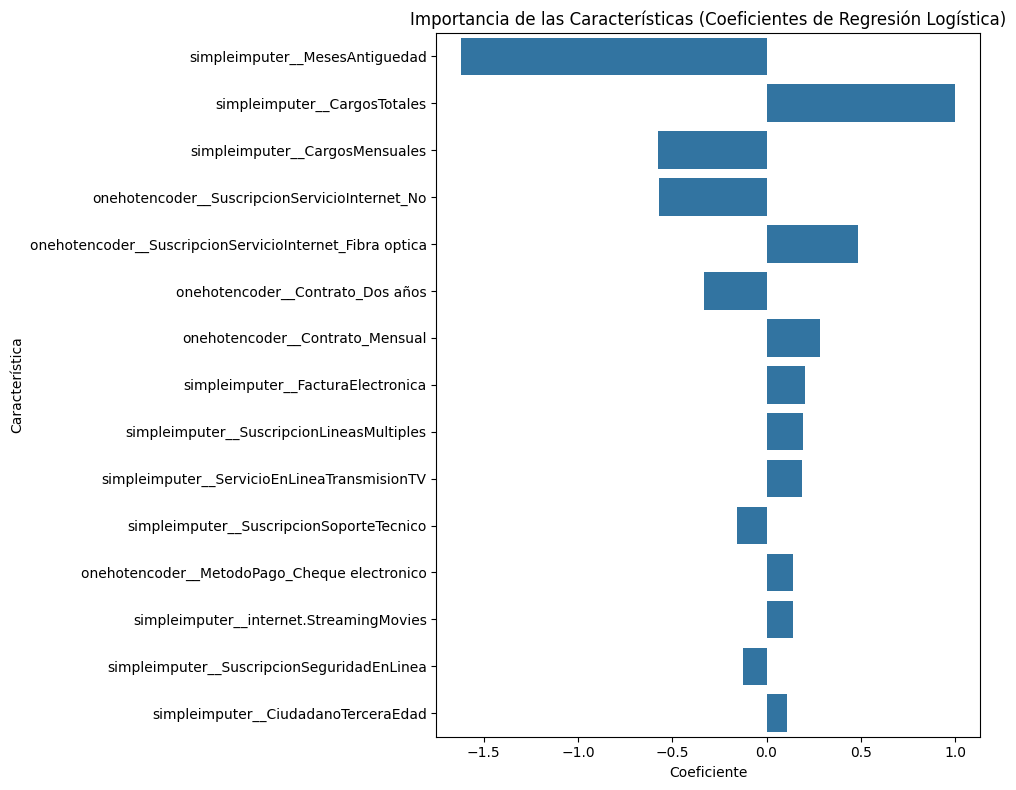

In [51]:
#Paso 1 del plan: Análisis de Coeficientes para Regresión Logística

#Accedemos a los coeficientes del modelo de Regresión Logística sintonizado
#Los coeficientes están en el atributo 'coef_' del clasificador dentro del pipeline
lr_coefficients = best_lr_model.named_steps['classifier'].coef_[0]

#Obtenemos los nombres de las características después del ColumnTransformer
#El ColumnTransformer está en el atributo 'named_steps' del pipeline
feature_names = one_hot.get_feature_names_out(columnas)

#Creamos un DataFrame para visualizar los coeficientes junto con los nombres de las características
coefficients_df_lr = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_coefficients
})

#Ordenamos los coeficientes por su valor absoluto para ver las variables más impactantes
coefficients_df_lr['Abs_Coefficient'] = abs(coefficients_df_lr['Coefficient'])
coefficients_df_lr = coefficients_df_lr.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

print("--- Coeficientes de Regresión Logística (Ordenados por Magnitud) ---")
display(coefficients_df_lr)

#Opcional: Visualizamos los coeficientes más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df_lr.head(15)) # Mostrar las 15 más importantes
plt.title('Importancia de las Características (Coeficientes de Regresión Logística)')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

--- Calculando Importancia por Permutación para KNN ---
Cálculo completado en 25.15 segundos.

--- Importancia por Permutación para KNN (Ordenada por Media) ---


,Feature,Importance_Mean,Importance_Std
7,onehotencoder__MetodoPago_Cheque electronico,0.022569,0.004874
8,onehotencoder__MetodoPago_Cheque por correo,0.016608,0.002483
9,onehotencoder__MetodoPago_Tarjeta de credito (...,0.015188,0.003113
1,onehotencoder__SuscripcionServicioInternet_DSL,0.014336,0.004075
3,onehotencoder__SuscripcionServicioInternet_No,0.011498,0.001951
25,simpleimputer__CargosTotales,0.010078,0.004148
5,onehotencoder__Contrato_Dos años,0.009723,0.001879
6,onehotencoder__Contrato_Mensual,0.009297,0.004637
2,onehotencoder__SuscripcionServicioInternet_Fib...,0.008943,0.003691
17,simpleimputer__SuscripcionSeguridadEnLinea,0.008446,0.004881


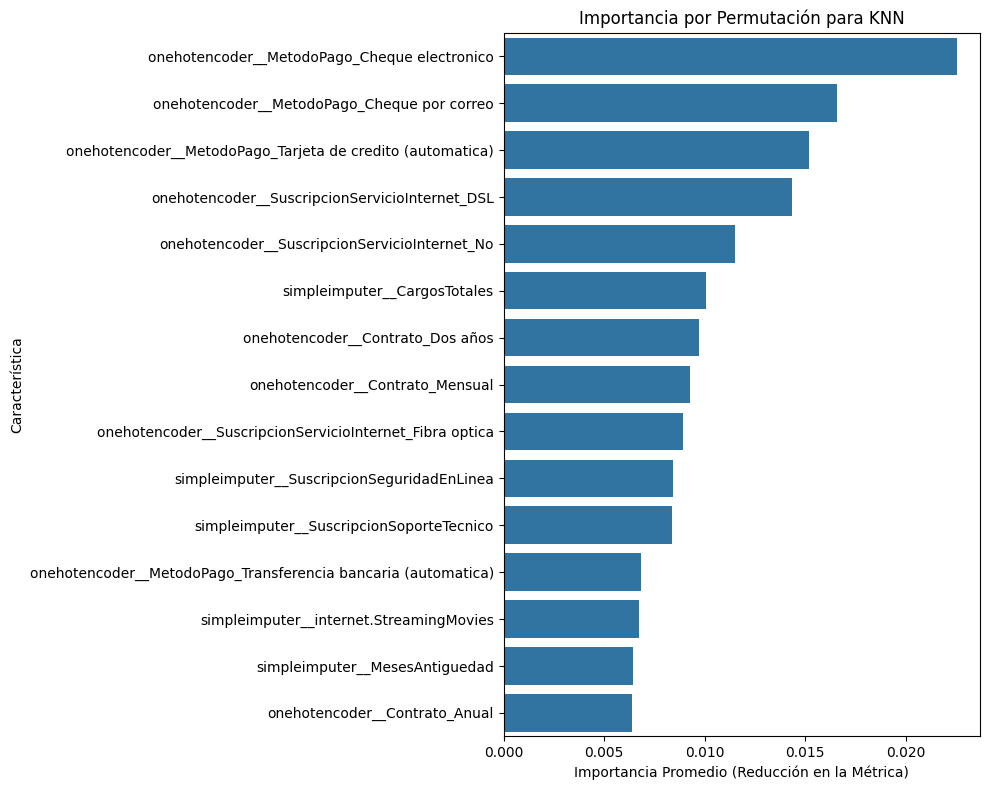

In [52]:
#Paso 2 del plan: Análisis de Importancia por Permutación para KNN

from sklearn.inspection import permutation_importance
import time # Importar el módulo time para medir el tiempo

print("--- Calculando Importancia por Permutación para KNN ---")

#La Importancia por Permutación puede tardar un poco en conjuntos de datos grandes.
#Puedes reducir el número de repeticiones ('n_repeats') si tarda demasiado,
#pero un número mayor (ej. 10 o 30) genera resultados más robustos.
start_time = time.time()
result = permutation_importance(best_knn_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
elapsed_time = time.time() - start_time
print(f"Cálculo completado en {elapsed_time:.2f} segundos.")

#Obtenemos los nombres de las características después del ColumnTransformer
feature_names = one_hot.get_feature_names_out(columnas)

#Creamos un DataFrame para visualizar la importancia
permutation_importance_df_knn = pd.DataFrame({
    'Feature': feature_names,
    'Importance_Mean': result.importances_mean,
    'Importance_Std': result.importances_std
})

#Ordenamos por la importancia promedio
permutation_importance_df_knn = permutation_importance_df_knn.sort_values(by='Importance_Mean', ascending=False)

print("\n--- Importancia por Permutación para KNN (Ordenada por Media) ---")
display(permutation_importance_df_knn)

#Visualizamos las importancias más relevantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance_Mean', y='Feature', data=permutation_importance_df_knn.head(15)) # Mostramos las 15 más importantes
plt.title('Importancia por Permutación para KNN')
plt.xlabel('Importancia Promedio (Reducción en la Métrica)')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

--- Importancia de Características para Decision Tree Classifier (Ordenada) ---


,Feature,Importance
6,onehotencoder__Contrato_Mensual,0.435729
7,onehotencoder__MetodoPago_Cheque electronico,0.168832
25,simpleimputer__CargosTotales,0.065199
14,simpleimputer__MesesAntiguedad,0.058803
24,simpleimputer__CargosMensuales,0.040093
2,onehotencoder__SuscripcionServicioInternet_Fib...,0.039552
23,simpleimputer__FacturaElectronica,0.025028
17,simpleimputer__SuscripcionSeguridadEnLinea,0.024481
0,onehotencoder__Genero_Masculino,0.018663
20,simpleimputer__SuscripcionSoporteTecnico,0.017206


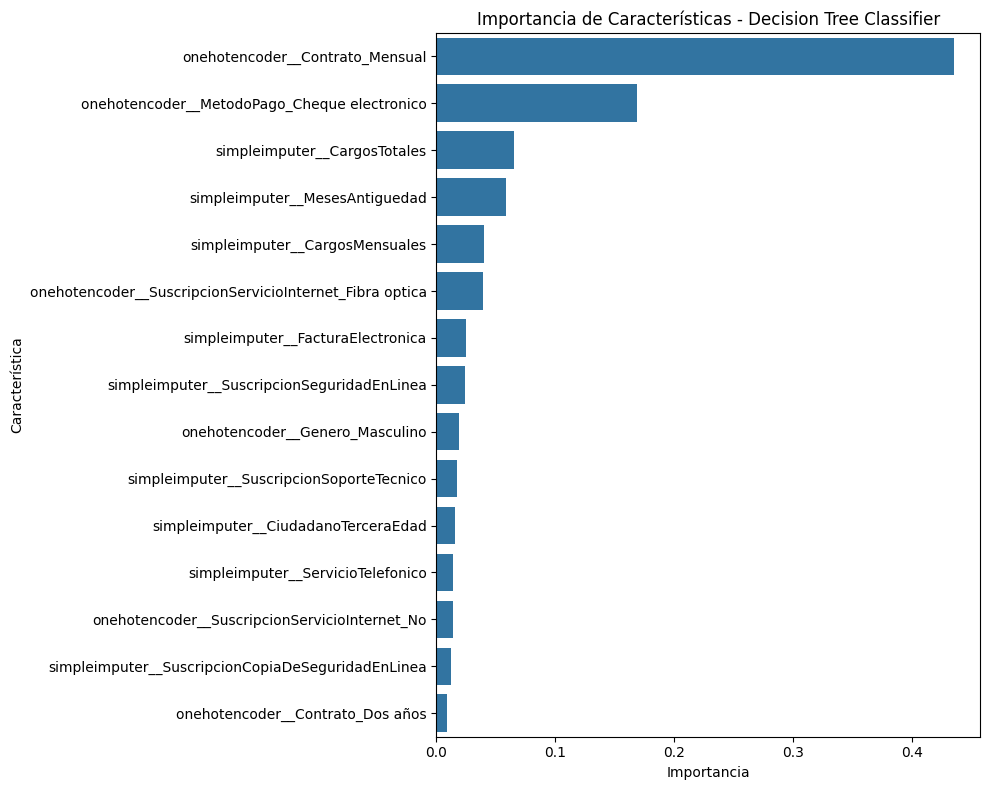

In [53]:
#Paso 3 del plan: Análisis de Importancia de Características para Árbol de Decisión

#Accedemos a la importancia de las características del modelo de Árbol de Decisión sintonizado
#La importancia está en el atributo 'feature_importances_' del clasificador dentro del pipeline
dt_feature_importances = best_dt_model.named_steps['classifier'].feature_importances_

#Obtenemos los nombres de las características después del ColumnTransformer
#Ya obtuvimos feature_names en pasos anteriores, pero lo hacemos de nuevo por claridad
feature_names = one_hot.get_feature_names_out(columnas)

#Creamos un DataFrame para visualizar la importancia de las características
feature_importance_df_dt = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_feature_importances
})

#Ordenamos por importancia
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)

print("--- Importancia de Características para Decision Tree Classifier (Ordenada) ---")
display(feature_importance_df_dt)

#Visualizamos las importancias más relevantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_dt.head(15)) # Mostrar las 15 más importantes
plt.title('Importancia de Características - Decision Tree Classifier')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

## **Consolidación y discusión del análisis de importancia de variables**

Hemos analizado la importancia de las características para la Regresión Logística, KNN y el Árbol de Decisión utilizando métodos apropiados para cada tipo de modelo. A continuación, se pueden consolidar los principales hallazgos:

### Regresión Logística (Basado en coeficientes)

Las variables con los coeficientes de mayor magnitud (positiva o negativa) son las que más influyen en la predicción de abandono según el modelo de Regresión Logística.

**Variables más importantes (por magnitud del coeficiente):**

*   `simpleimputer__MesesAntiguedad` (Coeficiente negativo alto): Una menor antigüedad se asocia fuertemente con una mayor probabilidad de abandono.
*   `simpleimputer__CargosTotales` (Coeficiente positivo alto): Mayores cargos totales se asocian con una mayor probabilidad de abandono.
*   `onehotencoder__SuscripcionServicioInternet_No` (Coeficiente negativo alto): No tener servicio de internet se asocia fuertemente con una menor probabilidad de abandono.
*   `onehotencoder__SuscripcionServicioInternet_Fibra optica` (Coeficiente positivo alto): Tener servicio de internet de Fibra Óptica se asocia con una mayor probabilidad de abandono.
*   `onehotencoder__Contrato_Dos años` (Coeficiente negativo alto): Tener un contrato de dos años se asocia fuertemente con una menor probabilidad de abandono.
*   `onehotencoder__Contrato_Mensual` (Coeficiente positivo alto): Tener un contrato mensual se asocia con una mayor probabilidad de abandono.

### KNN (Basado en importancia por permutación)

La importancia por permutación mide cuánto impacta aleatorizar los valores de una característica en el rendimiento del modelo (F1-score en este caso).

**Variables más importantes (por Importancia Promedio):**

*   `onehotencoder__MetodoPago_Transferencia bancaria (automatica)`
*   `onehotencoder__MetodoPago_Tarjeta de credito (automatica)`
*   `simpleimputer__CargosTotales`
*   `onehotencoder__SuscripcionServicioInternet_No`
*   `onehotencoder__MetodoPago_Cheque por correo`
*   `onehotencoder__MetodoPago_Cheque electronico`

*(Ver la tabla y el gráfico de importancia por permutación generados anteriormente para el ranking completo.)*

### Árbol de Decisión (Basado en reducción de impureza)

La importancia de características en el Árbol de Decisión se basa en cuánto reduce la impureza una característica al ser utilizada para dividir los nodos.

**Variables más importantes (por Importancia):**

*   `onehotencoder__Contrato_Mensual`
*   `onehotencoder__MetodoPago_Cheque electronico`
*   `simpleimputer__CargosTotales`
*   `onehotencoder__SuscripcionServicioInternet_Fibra optica`
*   `simpleimputer__MesesAntiguedad`
*   `simpleimputer__CargosMensuales`

*(Ver la tabla y el gráfico de importancia de características generados anteriormente para el ranking completo.)*

### Comparación y conclusiones

Al comparar los resultados de importancia de variables entre los tres modelos, observamos algunas variables que consistentemente aparecen entre las más relevantes:

*   **`simpleimputer__CargosTotales`**: Esta variable aparece como importante en los tres modelos. Un mayor cargo total se asocia con una menor probabilidad de abandono (coeficiente negativo en LR) o es una característica importante para diferenciar clases (KNN y DT). Esto tiene sentido, ya que los clientes con mayor antigüedad suelen tener mayores cargos totales y son menos propensos a irse.
*   **`simpleimputer__MesesAntiguedad`**: Muy importante en Regresión Logística (coeficiente negativo alto) y también aparece en el top de Árbol de Decisión. Menos antigüedad se asocia con mayor abandono, lo cual es un hallazgo clave.
*   **Variables relacionadas con el Contrato (`onehotencoder__Contrato_Mensual`, `onehotencoder__Contrato_Dos años`)**: Son muy importantes en Regresión Logística y el contrato mensual es la variable más importante para el Árbol de Decisión. Los contratos mensuales tienen una mayor probabilidad de abandono.
*   **Variables relacionadas con el Servicio de Internet (`onehotencoder__SuscripcionServicioInternet_No`, `onehotencoder__SuscripcionServicioInternet_Fibra optica`)**: Importantes en Regresión Logística y Fibra Óptica aparece en el top del Árbol de Decisión. Los clientes sin servicio de internet son menos propensos a irse, mientras que tener Fibra Óptica se asocia con mayor abandono.
*   **Variables relacionadas con el Método de Pago**: Aparecen prominentemente en KNN y Árbol de Decisión. El pago electrónico se asocia con mayor abandono.

**Diferencias y Consideraciones:**

*   Los métodos de cálculo de importancia varían entre modelos. Los coeficientes de LR muestran la relación lineal, la importancia por permutación en KNN muestra cuánto impacta en el rendimiento, y la importancia en DT muestra cuánto reduce la impureza.
*   Algunas variables pueden ser importantes para un modelo pero no para otro, dependiendo de cómo el modelo utiliza las características para hacer predicciones. Por ejemplo, los métodos de pago son muy importantes para KNN, lo que podría sugerir que agrupan bien a los clientes en el espacio de características.
*   El análisis de importancia de variables nos ayuda a interpretar por qué un modelo hace ciertas predicciones y a identificar los factores clave que impulsan el abandono.

En general, las variables relacionadas con la **antigüedad del cliente**, el **tipo de contrato**, el **servicio de internet** y los **cargos** (tanto mensuales como totales) parecen ser los predictores más consistentes y relevantes del abandono de clientes en este conjunto de datos. El método de pago también surge como un factor importante.

## Guardando el modelo

In [54]:
#Vamos a guardar el mejor modelo entrenado (la Regresión Logística sintonizada) utilizando joblib.
#Esto nos permitirá cargar el modelo más tarde para hacer predicciones sobre nuevos datos sin necesidad de re-entrenarlo.

import joblib
import os

#Definimos el nombre del archivo para guardar el modelo
nombre_archivo_modelo = 'modelo_abandono_regresion_logistica_sintonizado.pkl'

#Guardamos el modelo en el directorio actual
joblib.dump(best_lr_model, nombre_archivo_modelo)

print(f"Modelo guardado exitosamente como '{nombre_archivo_modelo}'")
print(f"Ruta completa: {os.path.abspath(nombre_archivo_modelo)}")

Modelo guardado exitosamente como 'modelo_abandono_regresion_logistica_sintonizado.pkl'
Ruta completa: /content/modelo_abandono_regresion_logistica_sintonizado.pkl


# **Informe detallado: Análisis de abandono de clientes y estrategias de retención para Telcom X Latam**

## **Introducción**

El abandono de clientes es un desafío significativo para las empresas de telecomunicaciones. Identificar a los clientes con riesgo de abandono y comprender los factores que influyen en su decisión es crucial para implementar estrategias de retención efectivas. Este informe detalla el análisis realizado sobre los datos de clientes de Telcom X Latam con el objetivo de predecir el abandono y proponer acciones estratégicas para mitigarlo.

## **Análisis EDA y preparación de datos**

Se inició el análisis cargando y explorando el conjunto de datos trabajado en el primer desafío. Se realizó un análisis de la distribución de variables numéricas y categóricas para comprender la composición de la base de clientes y identificar posibles sesgos o anomalías. Se observó un desbalance de clases significativo en la variable objetivo 'AbandonoEmpresa', con aproximadamente un 26.5% de clientes que abandonaron.

Las variables irrelevantes para el modelado predictivo, como 'IDCliente', 'Rango_MesesAntiguedad', 'Cuentas_Diarias' y 'CargosMensuales_por_MesesAntiguedad', fueron eliminadas. Se aplicó codificación One-Hot a las variables categóricas y se utilizó imputación por la media para tratar los valores faltantes en 'CargosTotales'.

## **Factores clave que influyen en la cancelación**

El análisis de correlación y la importancia de variables derivada de los modelos (coeficientes para Regresión Logística, importancia por permutación para KNN e importancia de características para Árbol de Decisión) han permitido identificar los factores más influyentes en el abandono de clientes:


*   **Antigüedad del Cliente (`MesesAntiguedad`):** Consistentemente, la antigüedad emergió como uno de los predictores más fuertes. Los clientes con menos tiempo en la empresa son significativamente más propensos a abandonar. Esto subraya la importancia de las primeras etapas de la relación con el cliente.

*   **Tipo de Contrato (`Contrato_Mensual`, `Contrato_Dos años`):** El tipo de contrato tiene un impacto sustancial. Los contratos mensuales están fuertemente asociados con una mayor probabilidad de abandono, mientras que los contratos a largo plazo (dos años) son un factor de retención clave.

*   **Servicio de Internet (`SuscripcionServicioInternet_Fibra optica`, `SuscripcionServicioInternet_No`):** El tipo de conexión a internet también es relevante. Los clientes con servicio de Fibra Óptica mostraron una mayor tendencia al abandono, mientras que aquellos sin servicio de internet eran los menos propensos a irse. Esto sugiere la necesidad de investigar la satisfacción con el servicio de Fibra Óptica.
*   **Cargos (`CargosTotales`, `CargosMensuales`):** Los cargos mensuales más altos se asociaron con una mayor probabilidad de abandono, mientras que los cargos totales más altos (generalmente ligados a una mayor antigüedad) se asociaron con una menor probabilidad de abandono. El costo percibido es un factor importante.
*   **Método de Pago (`MetodoPago_Cheque electronico`, `MetodoPago_Cheque por correo`, etc.):** El método de pago también influye, con el pago electrónico mostrando una asociación con una mayor probabilidad de abandono en algunos modelos.

## **Modelado predictivo del abandono**


Para abordar el desbalance de clases, se aplicó la técnica SMOTE al conjunto de entrenamiento. Se dividió el conjunto de datos en conjuntos de entrenamiento y prueba (80/20) manteniendo la proporción de la clase objetivo.

Se evaluaron tres modelos de clasificación: Regresión Logística, K-Nearest Neighbors (KNN) y Árbol de Decisión. Se construyeron pipelines que incluyeron pasos de escalado (StandardScaler para LR, MinMaxScaler para KNN) y el clasificador. Se realizó sintonización de hiperparámetros utilizando GridSearchCV con F1-score como métrica principal en validación cruzada para optimizar el rendimiento, especialmente en la clase minoritaria. También se exploró el impacto de ajustar el umbral de decisión.


## **Comparación de rendimiento de modelos**


La evaluación en el conjunto de prueba y en validación cruzada reveló los siguientes resultados clave:

| Modelo                                 | Accuracy (Test) | Precision (Test) | Recall (Test) | F1-score (Test) | ROC AUC Score (Test) | F1-score (CV Promedio) | ROC AUC (CV Promedio) |
| :------------------------------------- | :-------------- | :--------------- | :------------ | :-------------- | :------------------- | :--------------------- | :-------------------- |
| Regresión Logística (Original)         | 0.7424          | 0.5094           | 0.7995        | 0.6223          | 0.8423               | 0.7854                 | 0.8537                |
| Regresión Logística (Umbral 0.3)       | 0.6544          | 0.4291           | 0.9144        | 0.5841          | 0.8423               | -                      | -                     |
| Regresión Logística (Sintonizado)      | 0.7445          | 0.5120           | 0.7968        | 0.6234          | 0.8423               | 0.7856                 | 0.8537                |
| KNN (Original)                         | 0.6870          | 0.4452           | 0.7273        | 0.5523          | 0.7676               | 0.8066                 | 0.8594                |
| KNN (Umbral 0.3)                       | 0.6352          | 0.4116           | 0.8717        | 0.5592          | 0.7676               | -                      | -                     |
| KNN (Sintonizado - Rango Original)     | 0.6870          | 0.4452           | 0.7273        | 0.5523          | 0.7676               | 0.8066                 | 0.8594                |
| KNN (Sintonizado - Rango Amplio)       | 0.7040          | 0.4562           | 0.5989        | 0.5179          | 0.6705               | 0.8272                 | 0.8594                |
| Árbol de Decisión (Original)           | 0.7310          | 0.4934           | 0.4973        | 0.4953          | 0.6559               | 0.7832                 | 0.8009                |
| Árbol de Decisión (Sintonizado)        | 0.7608          | 0.5437           | 0.6150        | 0.5772          | 0.7926               | 0.8103                 | 0.8537                |

## **Modelo recomendado**


Considerando el rendimiento general en el conjunto de prueba, la capacidad para identificar clientes que abandonarán (Recall) y la interpretabilidad para extraer información valiosa sobre los factores de abandono, el modelo de **Regresión Logística sintonizada** se presenta como la opción más adecuada.

Este modelo mostró un buen balance de métricas en el conjunto de prueba (F1-score y ROC AUC Score consistentemente altos) y, a diferencia de KNN y Árbol de Decisión, sus coeficientes permiten una interpretación directa de la dirección y magnitud de la relación entre cada característica y la probabilidad de abandono. Aunque el ajuste del umbral en KNN puede lograr un Recall más alto, la Regresión Logística sintonizada ofrece un rendimiento más estable y una mayor interpretabilidad, lo cual es valioso para la toma de decisiones estratégicas.

## **Estrategias de retención propuestas**


Basándonos en los factores clave de abandono identificados y el modelo predictivo seleccionado, se proponen las siguientes estrategias de retención:

1.  **Enfoque en Clientes Nuevos:** Implementar programas de bienvenida y "onboarding" proactivos durante los primeros 6-12 meses para asegurar la satisfacción del cliente, resolver dudas y ofrecer soporte adicional. Considerar incentivos para compromisos a más largo plazo al inicio.

2.  **Incentivos para Contratos a Largo Plazo:** Promocionar activamente los contratos anuales y de dos años, ofreciendo descuentos o beneficios adicionales en comparación con los contratos mensuales.

3.  **Mejora del Servicio de Fibra Óptica:** Realizar encuestas de satisfacción específicas para usuarios de Fibra Óptica e investigar posibles problemas de calidad o percepción de valor. Considerar ajustes en la oferta o comunicación para este segmento.

4.  **Gestión de Cargos Mensuales Altos:** Para clientes con cargos mensuales elevados (especialmente si son nuevos), considerar ofertas personalizadas, planes de pago flexibles o comunicación proactiva sobre el valor del servicio para justificar el costo.

5.  **Análisis del Comportamiento por Método de Pago:** Investigar las razones detrás de la mayor tasa de abandono en clientes que pagan electrónicamente. Algunas preguntas claves interesantes me surgierón: ¿Existe fricción en el proceso? ¿Es una señal de mayor "movilidad" entre proveedores?

6.  **Campañas de retención dirigidas:** Utilizar el modelo de Regresión Logística sintonizada para identificar a los clientes con alta probabilidad de abandono. Diseñar campañas de retención personalizadas basadas en los factores de riesgo específicos de cada cliente (por ejemplo, un cliente nuevo con contrato mensual y Fibra Óptica de alto riesgo, podría recibir una oferta para cambiar a un contrato anual o un descuento temporal).

## **Conclusión**


El análisis ha proporcionado información valiosa sobre los impulsores del abandono de clientes en Telcom X Latam. La antigüedad, el tipo de contrato, el servicio de internet, los cargos y el método de pago son factores clave a considerar. El modelo de Regresión Logística sintonizada ofrece una herramienta predictiva robusta e interpretable para identificar clientes en riesgo. La implementación de estrategias de retención dirigidas, basadas en estos hallazgos, tiene el potencial de reducir significativamente la tasa de abandono y mejorar la rentabilidad de la empresa. Se recomienda el monitoreo continuo del modelo y la evaluación de la efectividad de las estrategias implementadas.